# EDA
**Project Assumption:** The target model is SVM

### Table of Contents

1. Introduction and Data Loading
    - 1.1. About the data
    - 1.2. Library Import
    - 1.3. Data Import
    - 1.4. Train - Test Split
    - 1.5. Saving Data Frames to parquet
2. Dataset Overview
3. Missing Data
4. Data Distribution and Correlation
    - 4.1. Histograms
    - 4.2. Feature Correlation (Heatmap)
    - 4.3. Box plots (Outliers detection)
5. Exploring Individual Features
    - 5.1. `vet_benefits`, `own_or_self`
    - 5.2. `state_prev_res`, `region_prev_res`, `mig_same`
    - 5.3. `mig_chg_msa`, `mig_chg_reg`, `mig_move_reg`, `mig_prev_sunbelt`
    - 5.4. `country_mother`, `country_father`, `country_self`
    - 5.5. `vet_question`
    - 5.6. `unemp_reason`
    - 5.7. `full_or_part_emp`
    - 5.8. `class_worker`
    - 5.9. `major_occ_code`, `major_ind_code`
    - 5.10. `det_hh_summ`, `det_hh_fam_stat`
    - 5.11. `citizenship`
    - 5.12. `fam_under_18`
6. Class Balance
7. Key Conclusions & Strategy
    - 7.1. Dataset Profile
    - 7.2. Candidates for Exclusion
    - 7.3. Feature Engineering Plan
    - 7.4. Modeling Implications

## 1. Introduction and Data Loading

### 1.1 About the data

This data set was obtained from the UC Irvine Machine Learning Repository and contains weighted census data extracted from the 1994 and 1995 Current Population Surveys conducted by the U.S. Census Bureau.

Target feature: income_50k

### 1.2 Library Import

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import math
import pyarrow as pa
import pyarrow.parquet as pq

pd.set_option('display.max_columns', None)

### 1.3 Data Import

In [2]:
original_dataset = fetch_openml(data_id=42750, as_frame=True)
original_df = original_dataset.frame

### 1.4 Train - Test Split

In [3]:
X = original_df.drop('income_50k', axis=1) 

y = original_df['income_50k']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

### 1.5 Saving Data Frames  to parquet

In [4]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

train_table = pa.Table.from_pandas(train_df)
test_table = pa.Table.from_pandas(test_df)

pq.write_table(train_table, 'data/train.parquet')
pq.write_table(test_table, 'data/test.parquet')

## 2. Dataset Overview

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159618 entries, 19304 to 56690
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   age               159618 non-null  int64  
 1   class_worker      159618 non-null  object 
 2   det_ind_code      159618 non-null  int64  
 3   det_occ_code      159618 non-null  int64  
 4   education         159618 non-null  object 
 5   wage_per_hour     159618 non-null  int64  
 6   hs_college        159618 non-null  object 
 7   marital_stat      159618 non-null  object 
 8   major_ind_code    159618 non-null  object 
 9   major_occ_code    159618 non-null  object 
 10  race              159618 non-null  object 
 11  hisp_origin       159618 non-null  object 
 12  sex               159618 non-null  object 
 13  union_member      159618 non-null  object 
 14  unemp_reason      159618 non-null  object 
 15  full_or_part_emp  159618 non-null  object 
 16  capital_gains     1596

In [6]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 159618 entries, 19304 to 56690
Series name: income_50k
Non-Null Count   Dtype 
--------------   ----- 
159618 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [7]:
X_train.head()

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,unemp_reason,full_or_part_emp,capital_gains,capital_losses,stock_dividends,tax_filer_stat,region_prev_res,state_prev_res,det_hh_fam_stat,det_hh_summ,unknown,mig_chg_msa,mig_chg_reg,mig_move_reg,mig_same,mig_prev_sunbelt,num_emp,fam_under_18,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year
19304,4,' Not in universe',0,0,' Children',0,' Not in universe',' Never married',' Not in universe or children',' Not in universe',' White',' All other',' Male',' Not in universe',' Not in universe',' Children or Armed Forces',0,0,0,' Nonfiler',' Not in universe',' Not in universe',' Child <18 never marr not in subfamily',' Child under 18 never married',999.71,' Nonmover',' Nonmover',' Nonmover',' Yes',' Not in universe',0,' Both parents present',' United-States',' United-States',' United-States',' Native- Born in the United States',0,' Not in universe',0,0,94
190135,11,' Not in universe',0,0,' Children',0,' Not in universe',' Never married',' Not in universe or children',' Not in universe',' White',' All other',' Female',' Not in universe',' Not in universe',' Children or Armed Forces',0,0,0,' Nonfiler',' Not in universe',' Not in universe',' Child <18 never marr not in subfamily',' Child under 18 never married',1301.89,NaN,NaN,NaN,' Not in universe under 1 year old',NaN,0,' Both parents present',' United-States',' United-States',' United-States',' Native- Born in the United States',0,' Not in universe',0,0,95
103736,47,' Not in universe',0,0,' Bachelors degree(BA AB BS)',0,' Not in universe',' Widowed',' Not in universe or children',' Not in universe',' White',' All other',' Female',' Not in universe',' Not in universe',' Not in labor force',0,0,0,' Nonfiler',' Not in universe',' Not in universe',' Householder',' Householder',1078.72,NaN,NaN,NaN,' Not in universe under 1 year old',NaN,0,' Not in universe',' Holand-Netherlands',' Holand-Netherlands',' Holand-Netherlands',' Foreign born- U S citizen by naturalization',0,' Not in universe',2,0,95
111242,52,' Private',33,29,' High school graduate',0,' Not in universe',' Married-civilian spouse present',' Retail trade',' Other service',' White',' All other',' Female',' Not in universe',' Not in universe',' Full-time schedules',0,0,0,' Joint both under 65',' Not in universe',' Not in universe',' Spouse of householder',' Spouse of householder',538.50,NaN,NaN,NaN,' Not in universe under 1 year old',NaN,1,' Not in universe',' United-States',' United-States',' United-States',' Native- Born in the United States',0,' Not in universe',2,50,95
41624,11,' Not in universe',0,0,' Children',0,' Not in universe',' Never married',' Not in universe or children',' Not in universe',' White',' All other',' Female',' Not in universe',' Not in universe',' Children or Armed Forces',0,0,0,' Nonfiler',' Not in universe',' Not in universe',' Grandchild <18 never marr not in subfamily',' Other relative of householder',2168.11,NaN,NaN,NaN,' Not in universe under 1 year old',NaN,0,' Neither parent present',' United-States',' United-States',' United-States',' Native- Born in the United States',0,' Not in universe',0,0,95


In [8]:
y_train.unique()

array(["' - 50000.'", "' 50000+.'"], dtype=object)

### Observations:
- **Dataset Size:** Large volume (potential computational bottleneck)
- **Feature Space:** Many categorical features present
- **Target Variable:** Formatting required
- **Cleaning:** Categorical features are formatted as `' ...'`

## 3. Missing Data

In [9]:
full_df = pd.concat([X_train, y_train], axis=1)

missing = pd.DataFrame({
    'count': full_df.isnull().sum(),
    'percent': full_df.isnull().mean() * 100
})

print(missing[missing['count'] > 0].sort_values('count', ascending=False))

                  count    percent
mig_chg_msa       79684  49.921688
mig_chg_reg       79684  49.921688
mig_move_reg      79684  49.921688
mig_prev_sunbelt  79684  49.921688
country_father     5404   3.385583
country_mother     4956   3.104913
country_self       2728   1.709080
state_prev_res      565   0.353970


### Observations:
- **High Missingness (~50%):** Candidates for feature dropping
- **Low Missingness (<4%):** Candidates for value imputation

## 4. Data Distribution and Corelation

### 4.1 Histograms

### 4.1.1 Numeric Features Histograms

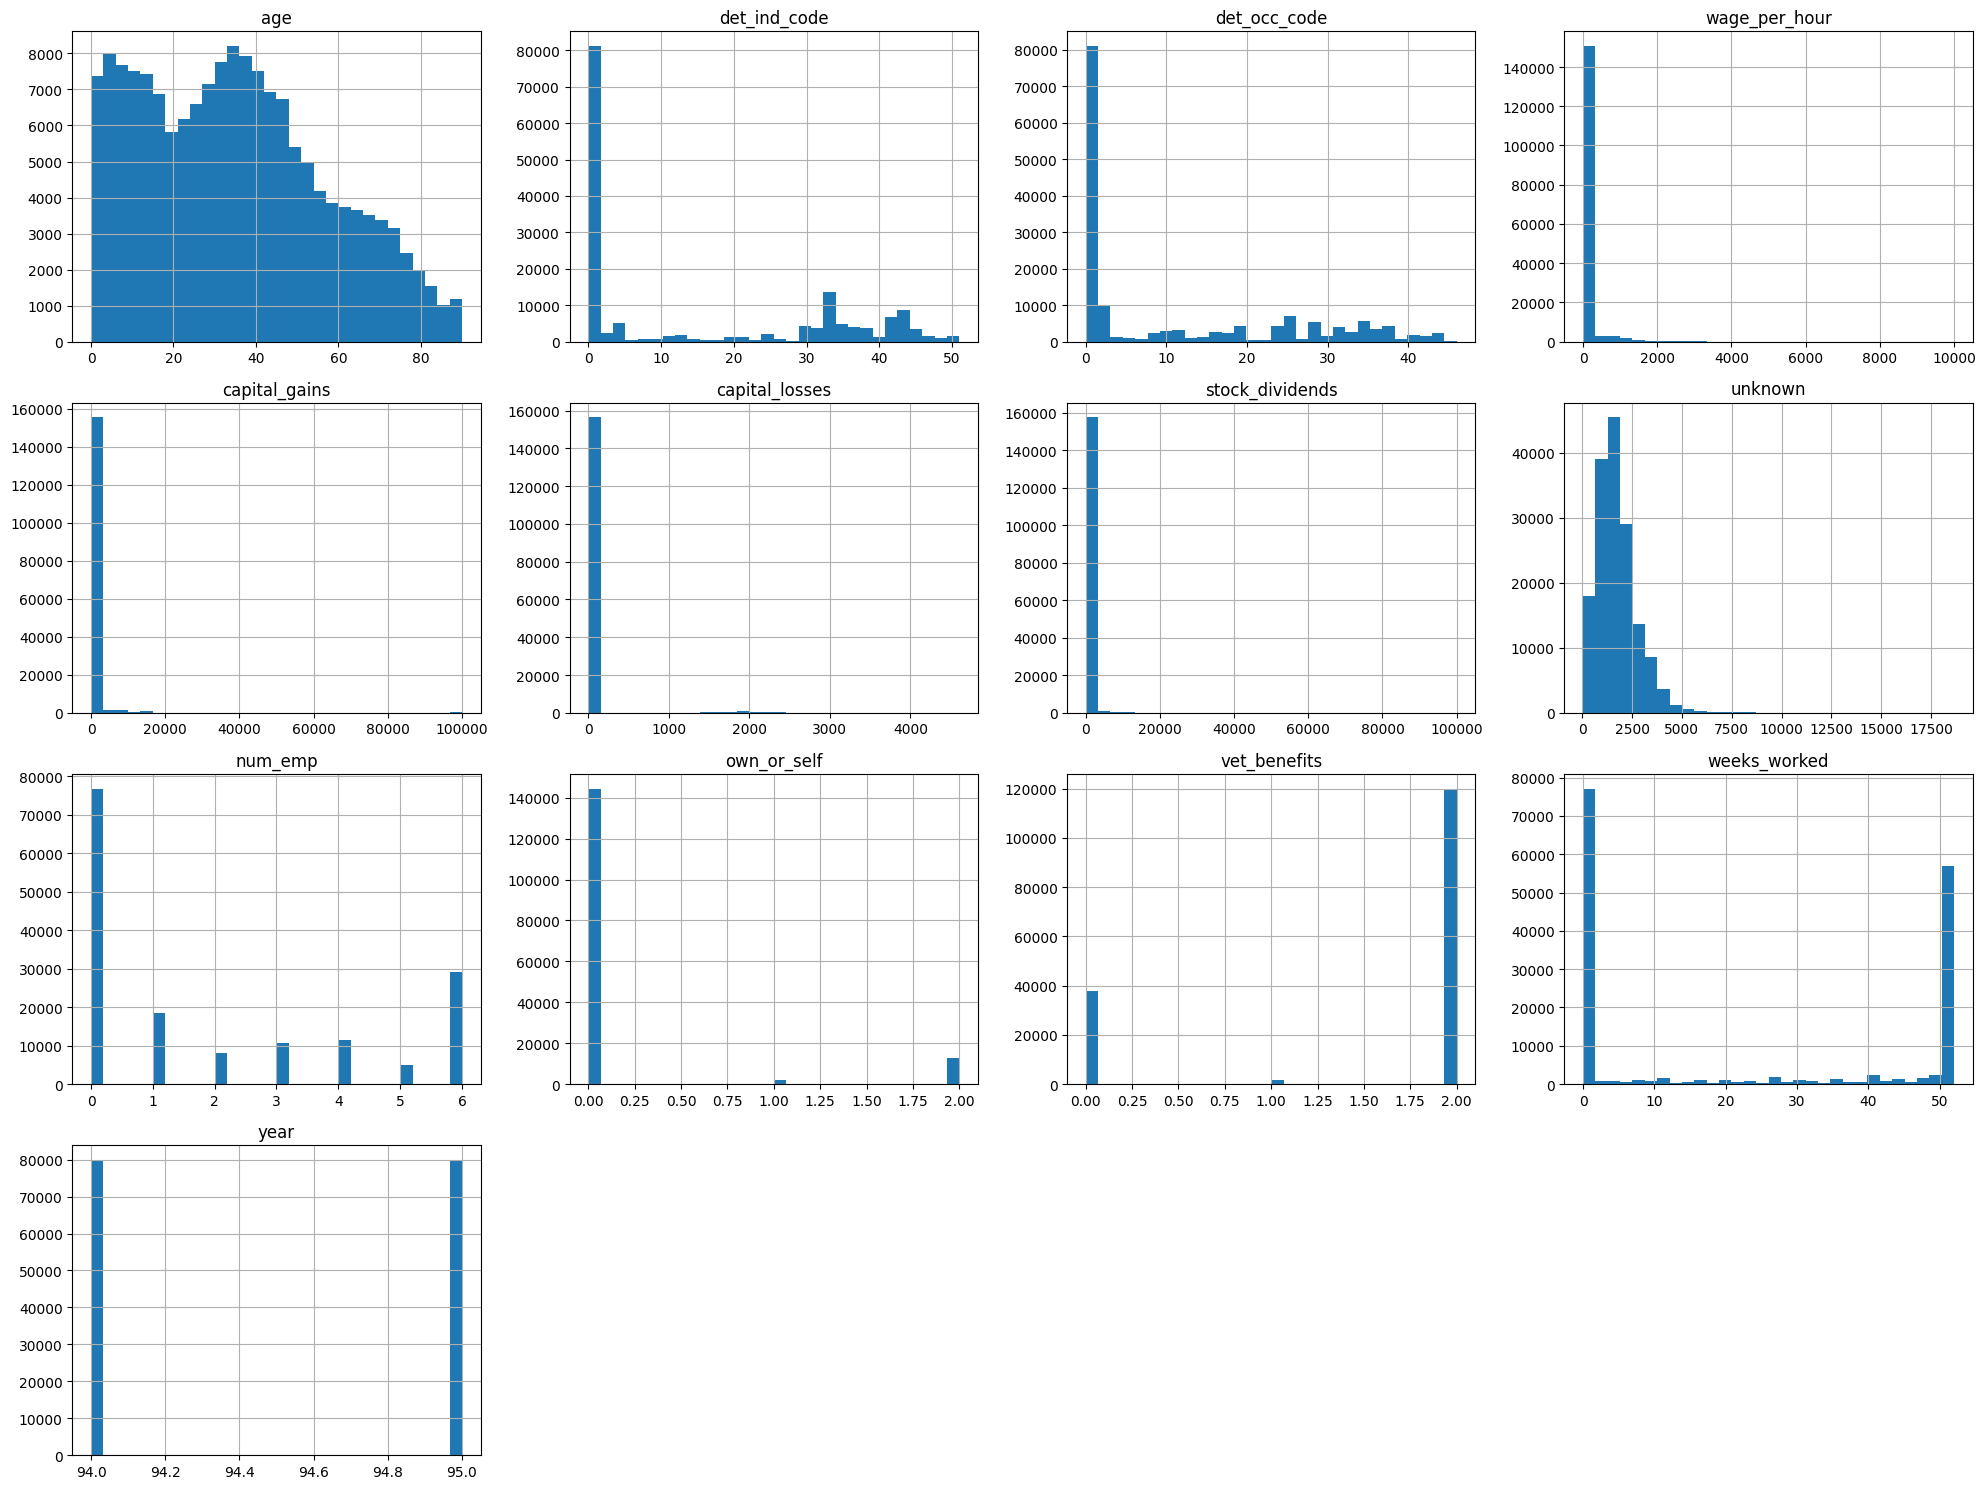

In [10]:
X_train.hist(bins=30, figsize=(20, 15))
plt.tight_layout() 
plt.show()


In [16]:
X_train.describe()

,age,det_ind_code,det_occ_code,wage_per_hour,capital_gains,capital_losses,stock_dividends,unknown,num_emp,own_or_self,vet_benefits,weeks_worked,year
count,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000,159618.000000
mean,34.477402,15.352416,11.303932,55.598842,439.324525,37.615645,201.147064,1740.463546,1.958044,0.175882,1.514153,23.187955,94.499217
std,22.311681,18.067039,14.453613,276.630490,4734.204849,273.472553,2039.919843,993.943612,2.366123,0.554199,0.851963,24.412444,0.500001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1061.445000,0.000000,0.000000,2.000000,0.000000,94.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1617.370000,1.000000,0.000000,2.000000,8.000000,94.000000
75%,50.000000,33.000000,26.000000,0.000000,0.000000,0.000000,0.000000,2189.410000,4.000000,0.000000,2.000000,52.000000,95.000000
max,90.000000,51.000000,46.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000,95.000000


### Observations:
- **Zero-inflated & Capped:** `capital_gains`, `stock_dividends`, and `wage_per_hour` are heavily skewed with artificial ceilings (e.g., 99999)
- **Dominance of Zeros (Sparsity):** Descriptive statistics confirm that `wage_per_hour` is heavily zero-inflated (the 75th percentile is $0$)
- **Nominal Integers:** `det_ind_code` and `det_occ_code` represent distinct categories, not continuous quantities
- **Categorical Flags:** `own_or_self` and `vet_benefits` contain discrete values (0, 1, 2) acting as classes
- **Bimodal/Low Variance:** `year` contains only two values (94, 95), offering limited predictive power
- **Distribution peaks:** `weeks_worked` shows strong peaks at 0 (unemployed) and 52 (full-year employment)
- **Uninterpretable:** `unknown`

### 4.1.2 Categorical Features Histograms

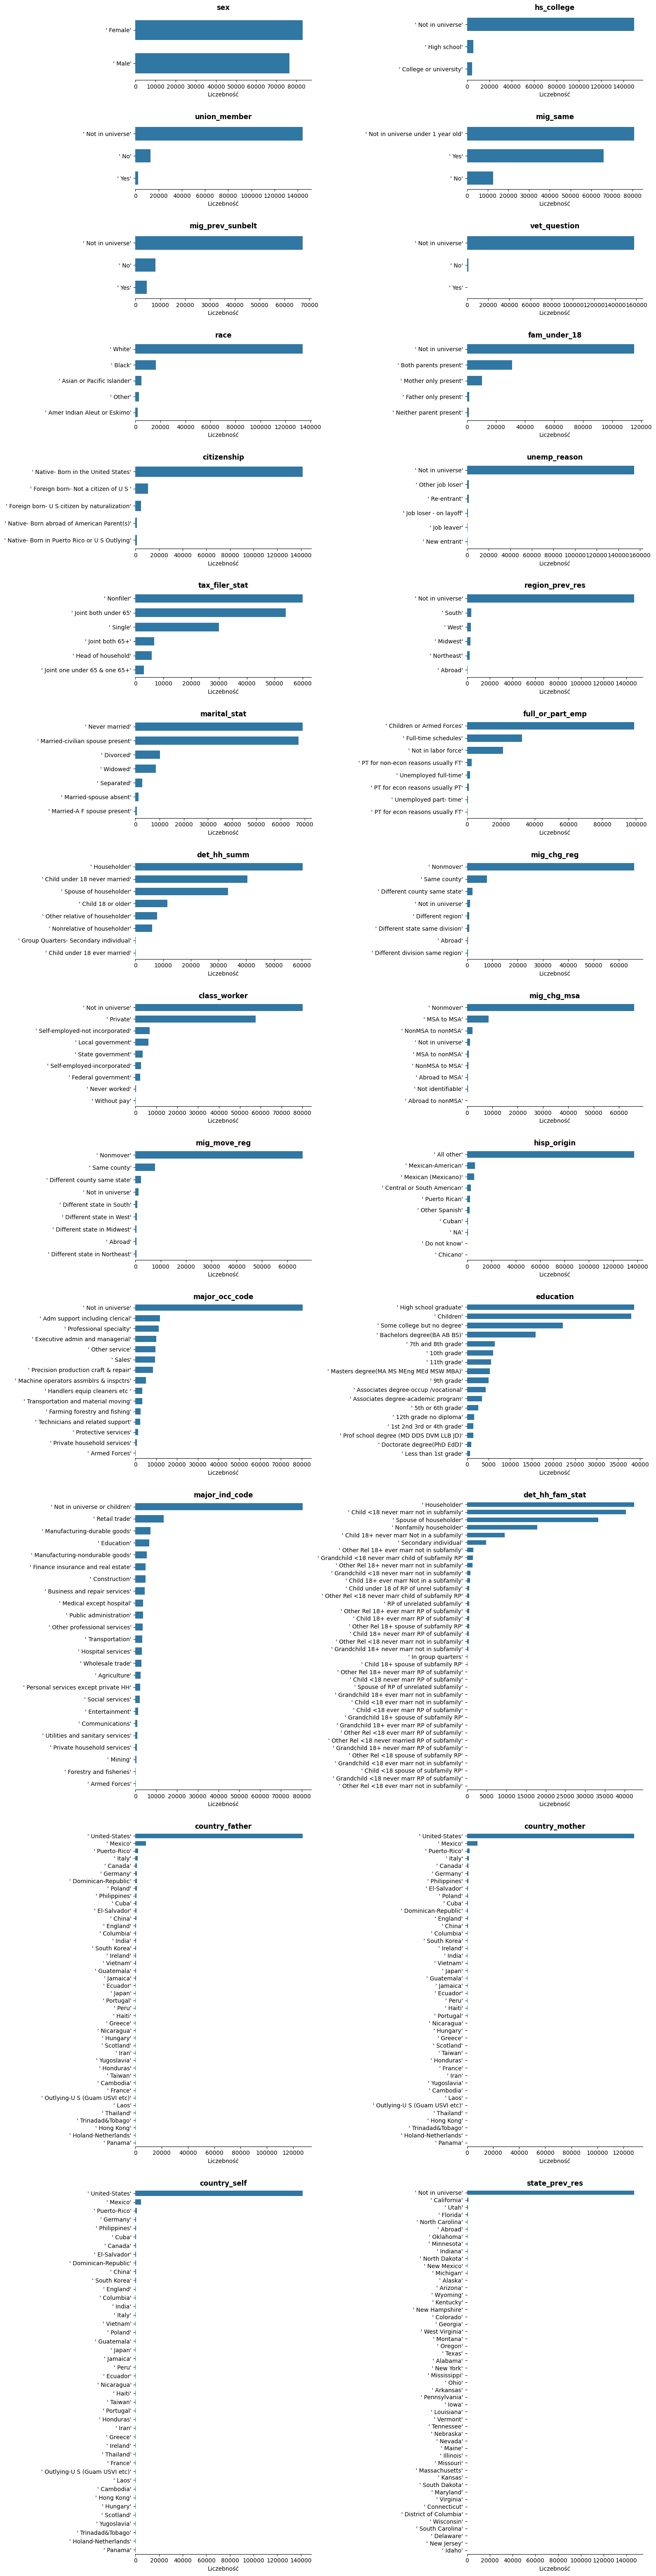

In [17]:
cols = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

cols.sort(key=lambda x: X_train[x].nunique())

cols_per_row = 2
num_rows = math.ceil(len(cols) / cols_per_row)

row_heights = []
for i in range(0, len(cols), cols_per_row):
    row_cols = cols[i : i + cols_per_row]
    max_cats_in_row = max([X_train[c].nunique() for c in row_cols])
    

    height = 1.5 + (max_cats_in_row * 0.2)
    row_heights.append(height)

total_height = sum(row_heights)

fig, axes = plt.subplots(
    num_rows, 
    cols_per_row, 
    figsize=(16, total_height),
    gridspec_kw={'height_ratios': row_heights}
)

if num_rows == 1: axes = [axes]
else: axes = axes.flatten()

for i, col in enumerate(cols):
    order = X_train[col].value_counts().index
    
    sns.countplot(data=X_train, y=col, ax=axes[i], color='#1E7BB6', order=order, width=0.6)
    
    axes[i].set_title(col, fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Liczebność")
    axes[i].set_ylabel("")
    axes[i].tick_params(axis='y', labelsize=10)

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].spines['left'].set_visible(False) 

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.subplots_adjust(hspace=0.3) 
plt.show()

### Observations:
- **High Cardinality / Grouping Required:** `major_ind_code`, `major_occ_code`, `country_father`, `country_mother`, `country_self`, `state_prev_res`, `det_hh_fam_stat`, `det_hh_summ`, `class_worker`, `unemp_reason`, `full_or_part_empl`, `fam_under_18`, `citizenship`
- **Ordinal Potential (Hierarchy):** `education`
- **Ethical Exclusions:** `race`, `sex`, `hisp_origin`
- **Low Variance / High Nulls (Drop Candidates):** `vet_question`, `mig_chg_msa`, `mig_chg_reg`, `mig_move_reg`, `mig_prev_sunbelt`, `region_prev_res`
- **Good Quality Features:** `hs_college`, `marital_stat`, `union_member`, `tax_filler_stat`, `mig_same`
- **Data Insight:** `education` reveals a high volume of 'Children'

### 4.2 Feature corelation

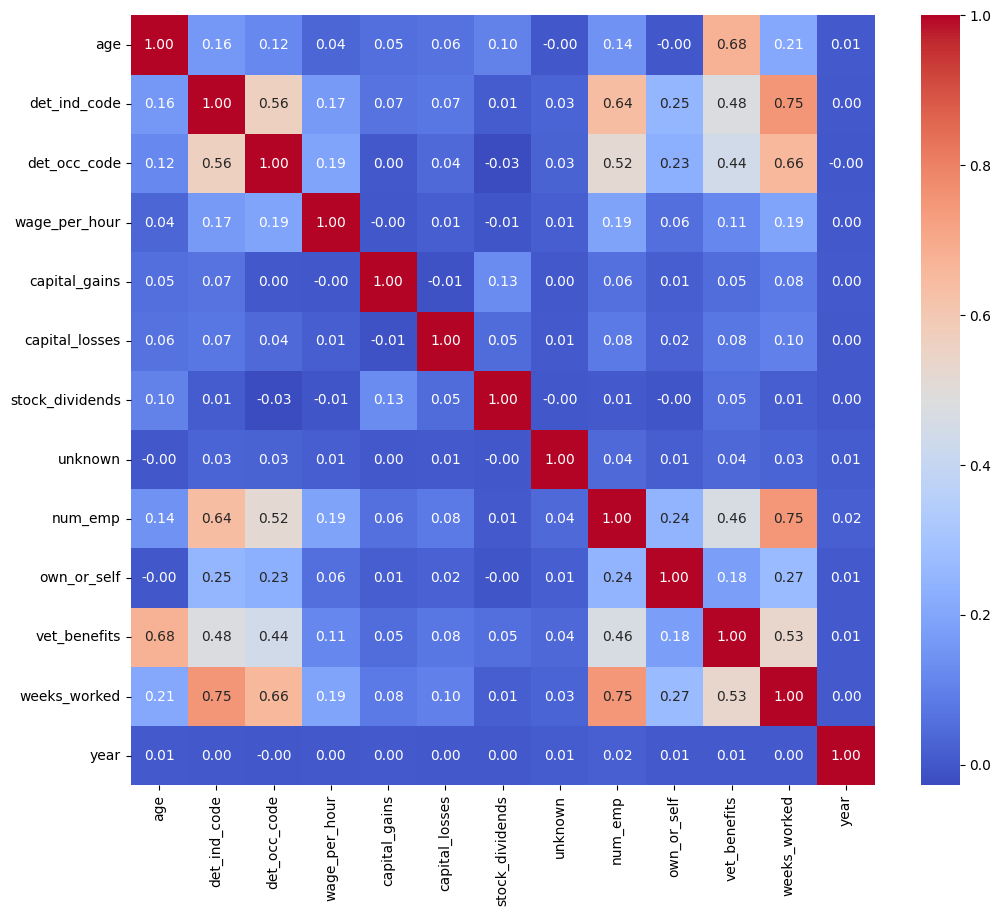

In [18]:
X_train_numeric = X_train.select_dtypes(include=['number'])
corr_matrix = X_train_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Observations:
- **Misleading Metrics:** High correlation (0.75) involving `det_ind_code` is artificial (nominal variable treated as numeric)
- **Redundancy:** `weeks_worked` and `num_emp` are highly correlated (0.75), risking multicollinearity
- **Demographics:** Strong link between `age` and `vet_benefits` (0.68) - veterans are generally older
- **Financial Independence:** `capital_gains` and `capital_losses` show near-zero correlation (distinct signals)

### 4.3 Box plots

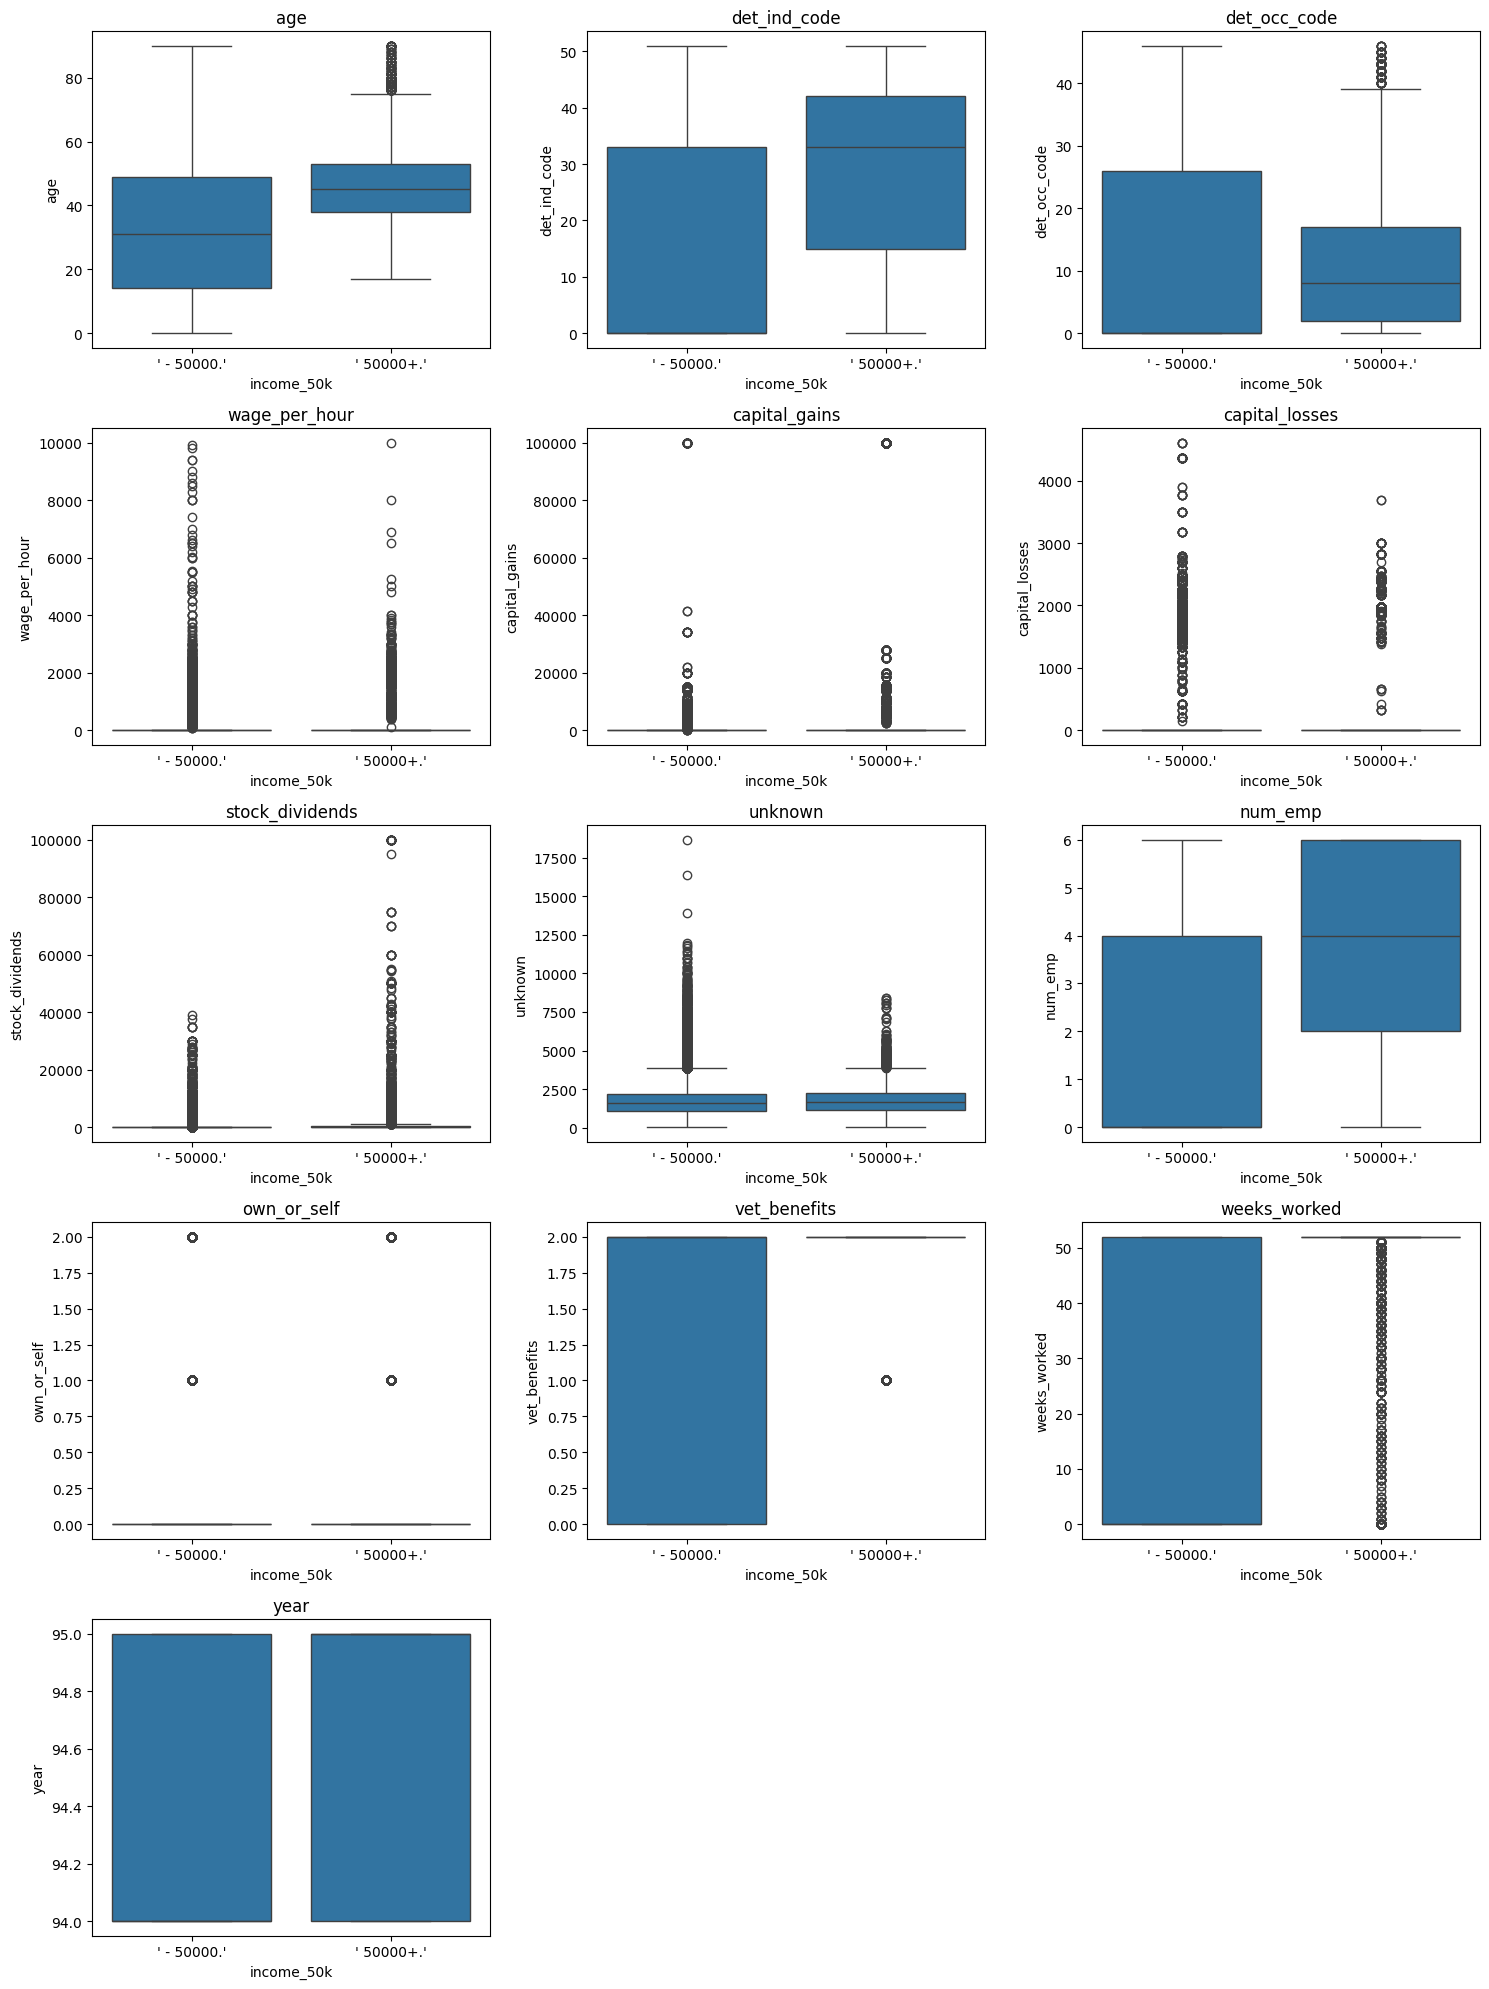

In [19]:
numeric_cols = X_train.select_dtypes(include=['number']).columns
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

plt.figure(figsize=(15, 4 * n_rows))

for i, col in enumerate(numeric_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=y_train, y=X_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

### Observations:
- **Disguised Categoricals:** `det_ind_code`, `det_occ_code`, `own_or_self`, `vet_benefits` must be converted to objects
- **Extreme Outliers:** `capital_gains`, `capital_losses`, `stock_dividends` show an extremely large spread of values
- **Strong Predictors:** `age`, `weeks_worked`, `num_emp` show clear separation between classes
- **Non-predictive:** `year` (identical distributions) and `unknown` (likely statistical weight/noise) should be dropped

## 5. Exploring Indivudial Features

### 5.1 `vet_benefits`, `own_or_self`
These features are evidently categorical, but the label mapping (e.g., 0 vs 2) is ambiguous. Assuming the most frequent value typically represents 'Not in universe' (as seen in other features), inconsistency is observed: `vet_benefits` is dominated by '2', whereas `own_or_self` is dominated by '0'.

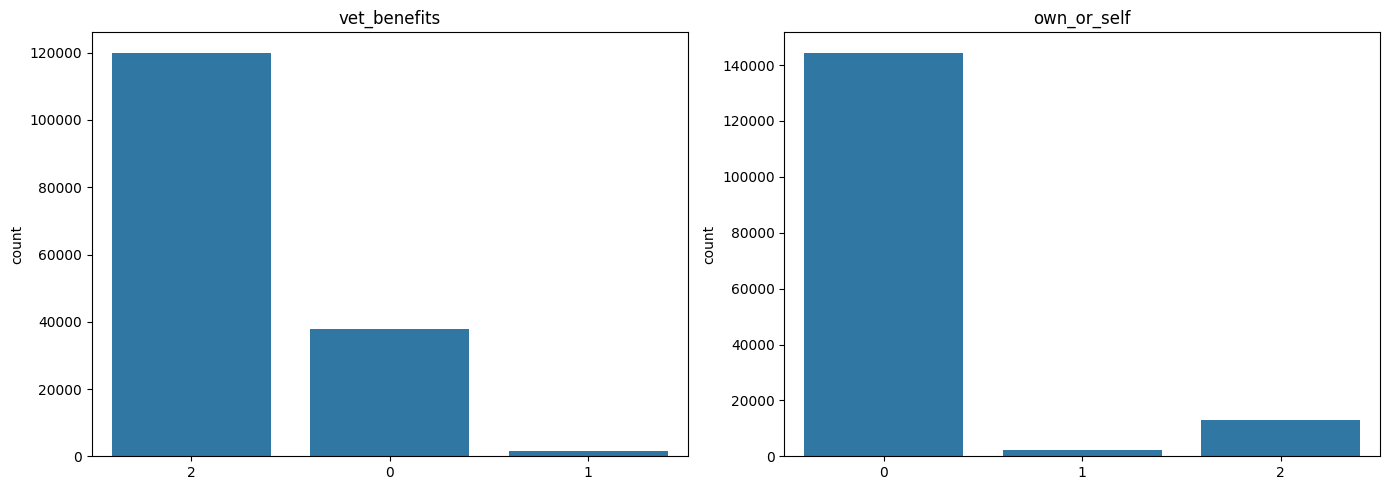

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

order_vq = X_train['vet_benefits'].value_counts().index
sns.countplot(data=X_train, x='vet_benefits', order=order_vq, ax=axes[0], color='#1E7BB6')
axes[0].set_title('vet_benefits')
axes[0].set_xlabel('')

sns.countplot(data=X_train, x='own_or_self', ax=axes[1], color='#1E7BB6')
axes[1].set_title('own_or_self')
axes[1].set_xlabel('')

plt.tight_layout()
plt.show()

### Observations:
- **Semantic Ambiguity:** Integer labels (0, 1, 2) lack clear definitions (missing data dictionary)
- **Black Box Risk:** Impossible to map model weights back to real-world categories

### 5.2 `state_prev_res` vs `region_prev_res` vs `mig_same`
These three features represent migration history at different levels of granularity. `state_prev_res` provides specific location data (high cardinality), while `region_prev_res` aggregates this into broad areas. `mig_same` indicates residential stability. The analysis aims to check if the granular data (state) offers better predictive power than the aggregated data (region) or if they can be simplified.

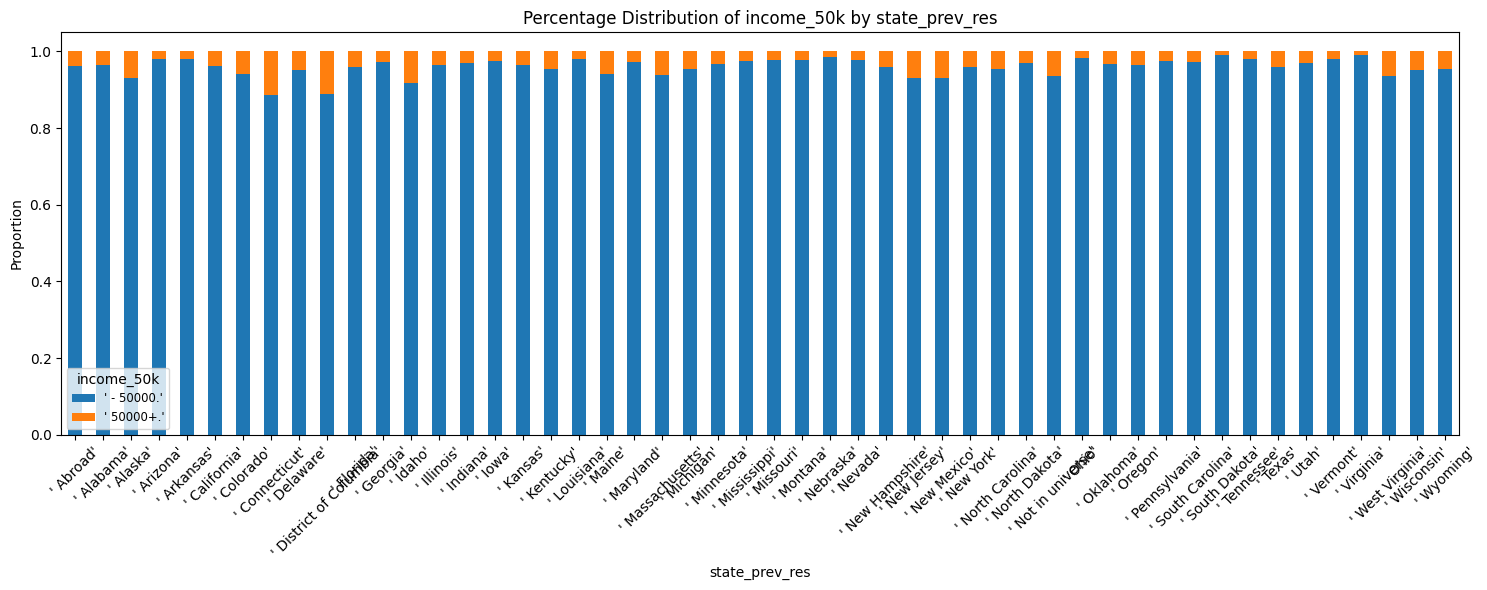

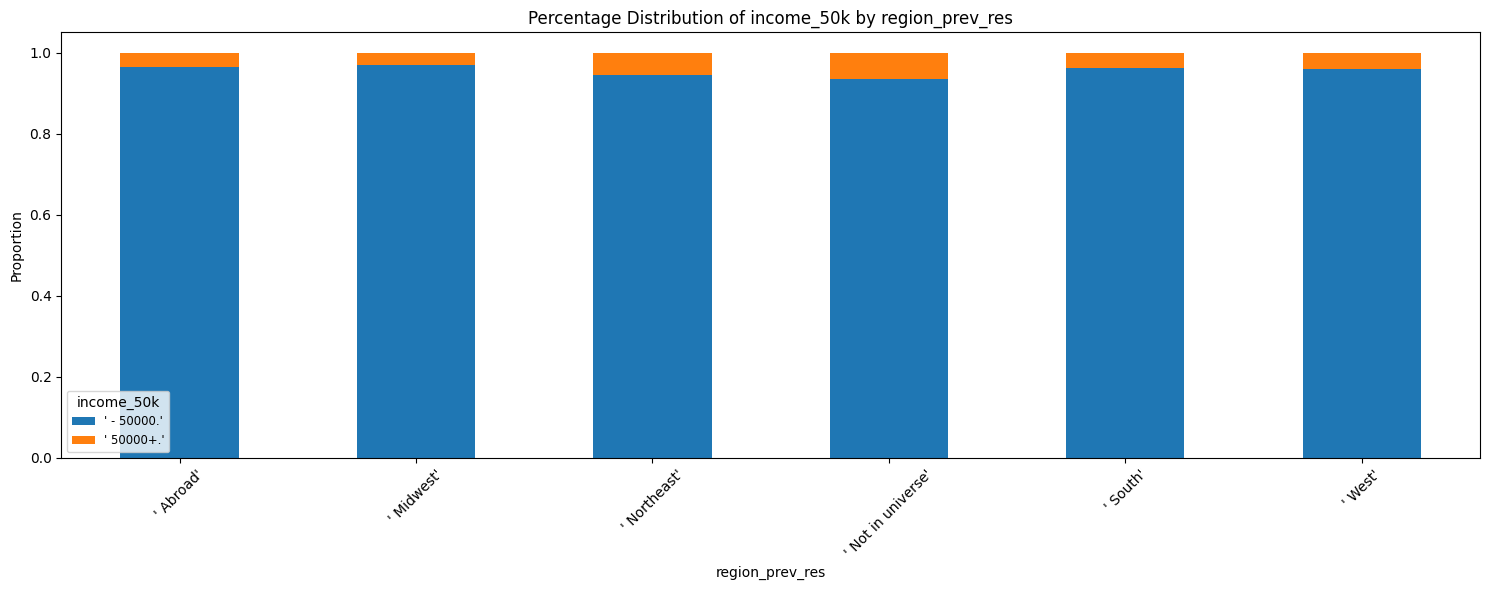

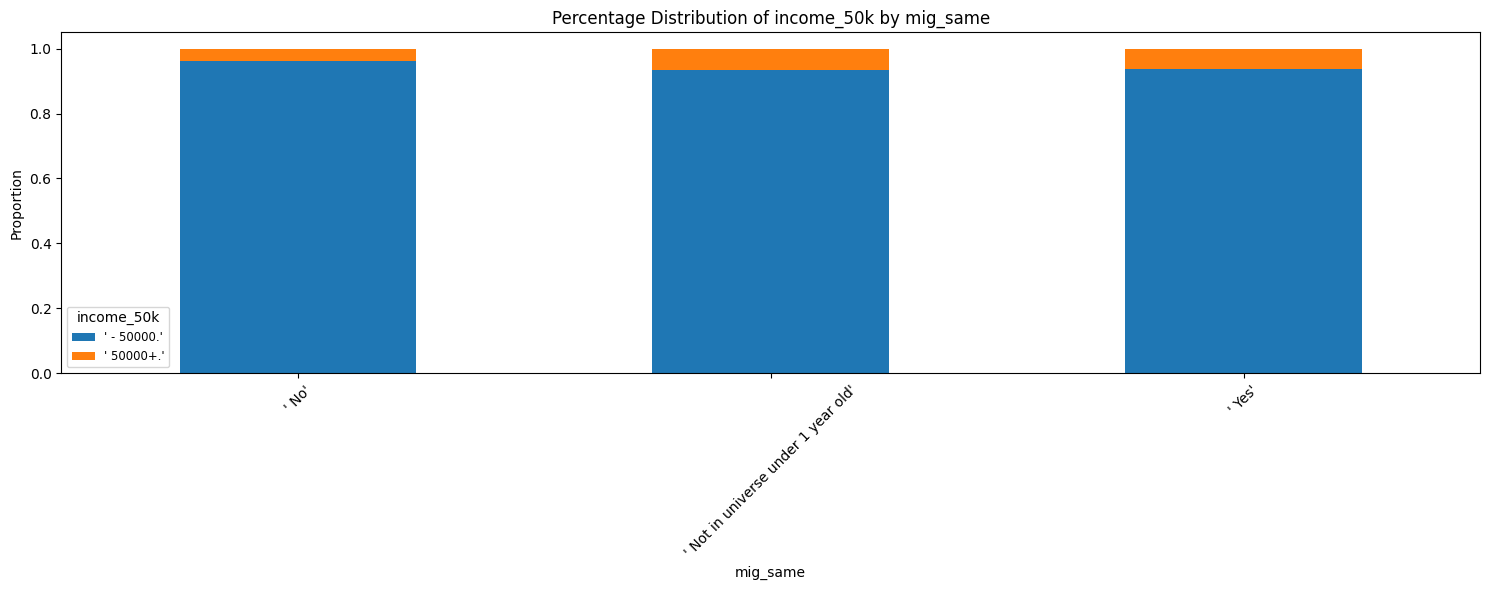

In [21]:
df_plot = X_train.copy()
df_plot['income_50k'] = y_train

features = ['state_prev_res', 'region_prev_res', 'mig_same']

for col in features:
    cross_tab = pd.crosstab(df_plot[col], df_plot['income_50k'], normalize='index')
    
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(15, 6))

    plt.title(f'Percentage Distribution of income_50k by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='income_50k', loc='lower left', fontsize='small')
    plt.tight_layout()
    plt.show()

### Observations:
- **High Cost, Low Gain:** `state_prev_res` introduces high cardinality (massively increasing dimensionality after encoding) without showing distinct separation in the target variable.
- **Low Discriminative Power:** `region_prev_res` shows a flat distribution, indicating that the specific region of origin has negligible impact on income prediction.
- **Efficient Proxy:** `mig_same` effectively captures the core information (residential stability vs. migration) with minimal complexity.

### 5.3  `mig_chg_msa`, `mig_chg_reg`, `mig_move_reg`, `mig_prev_sunbelt`
These variables contain a high volume of missing values and placeholder categories. We test the hypothesis whether these features can be consolidated.

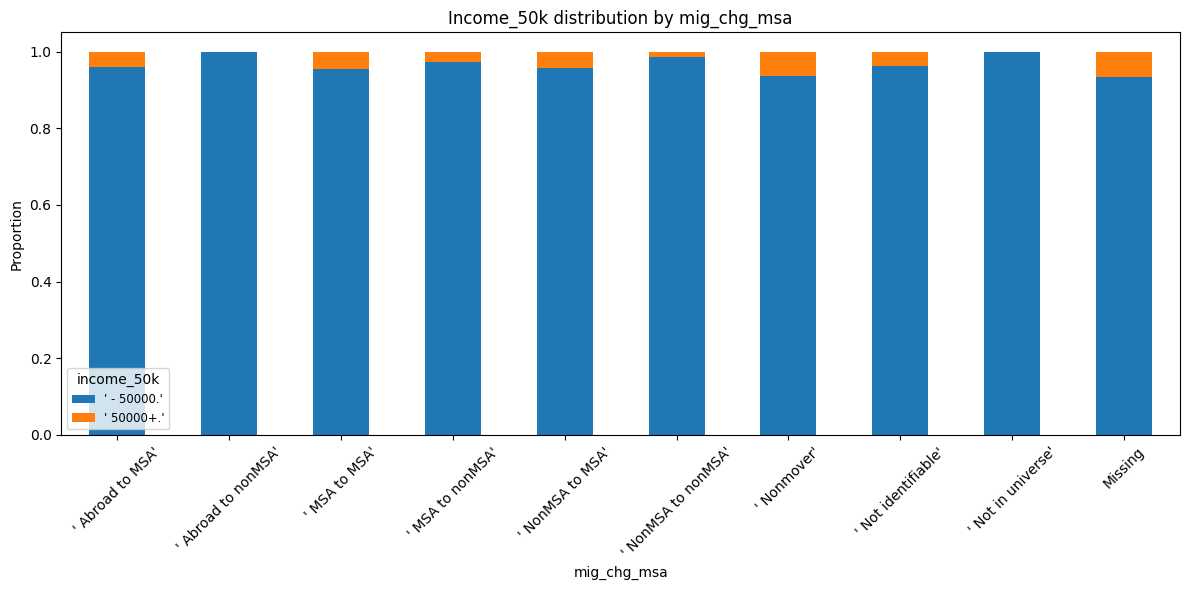

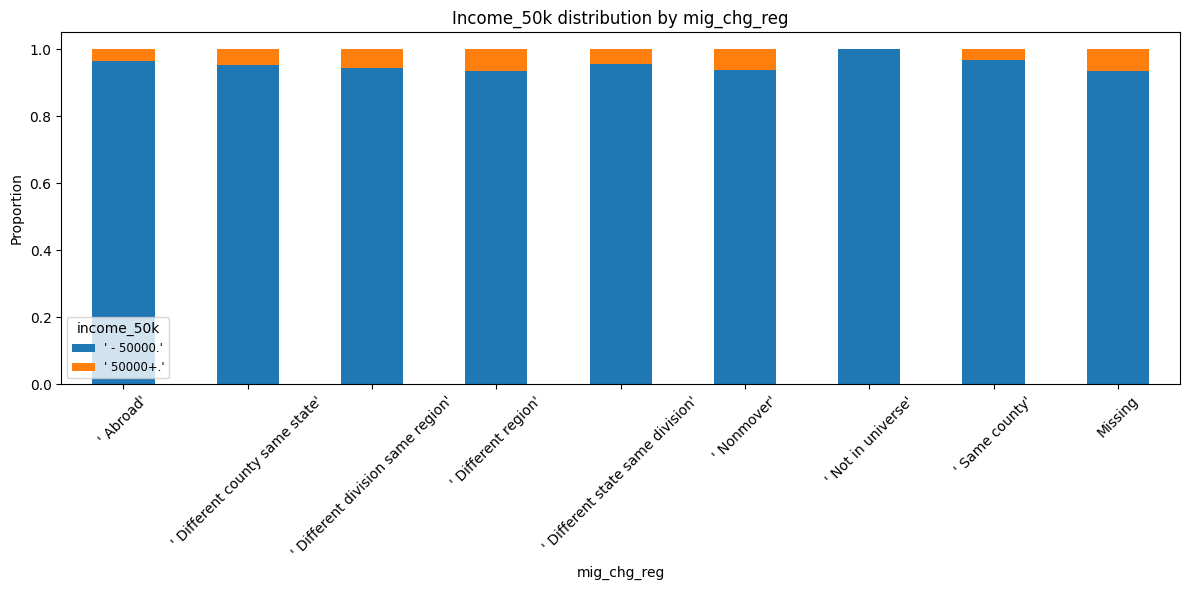

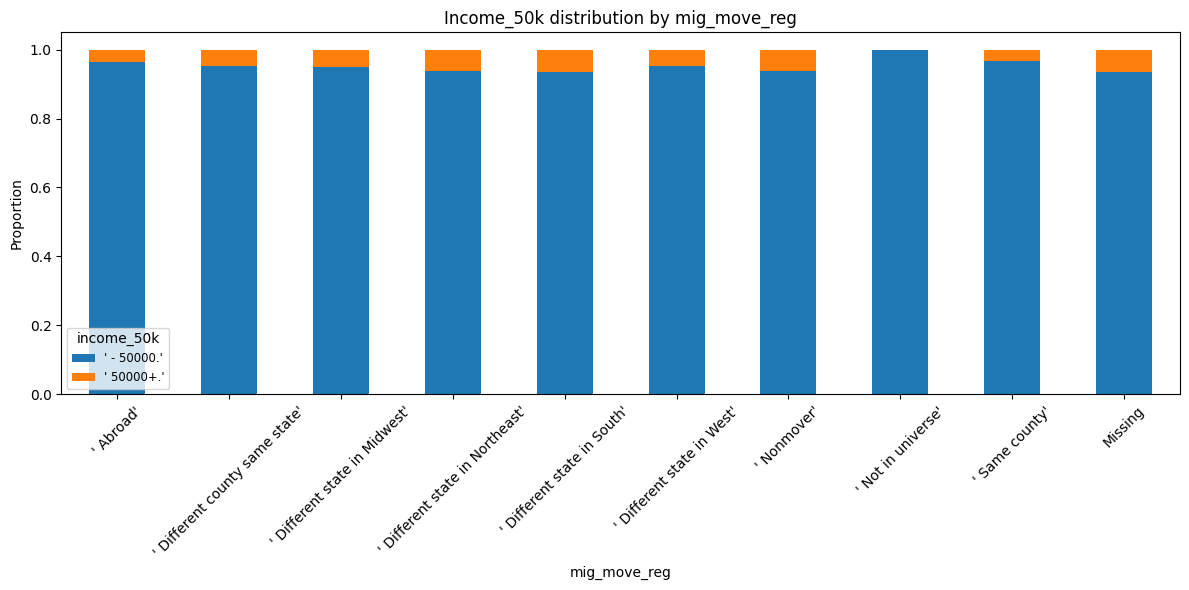

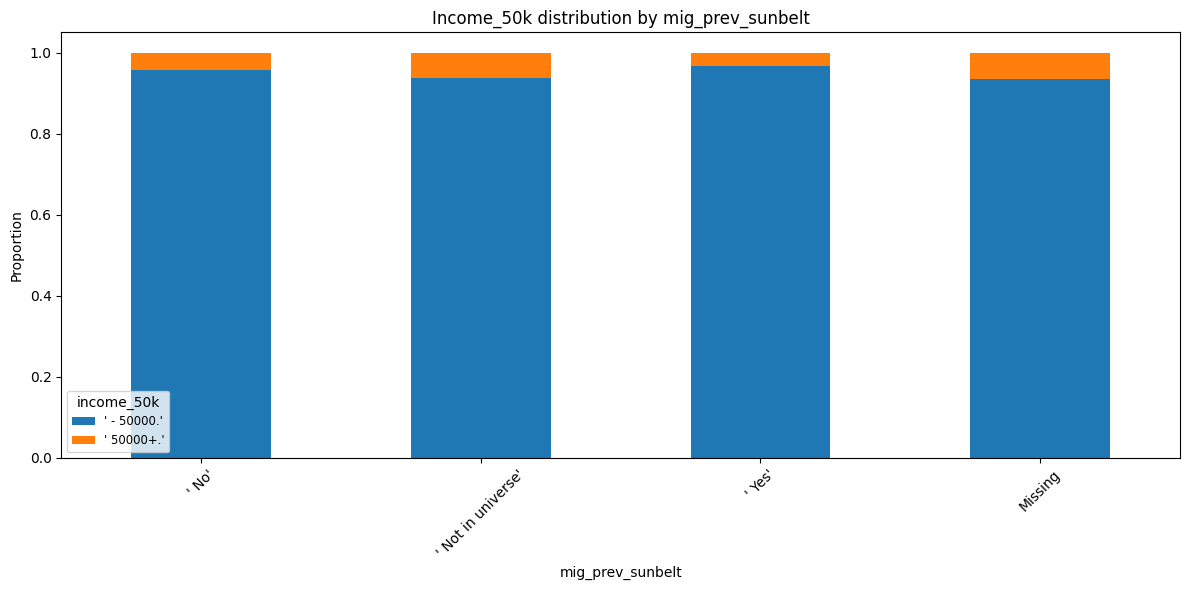

In [22]:
features = ['mig_chg_msa', 'mig_chg_reg', 'mig_move_reg', 'mig_prev_sunbelt']
df = X_train.copy()
df['income_50k'] = y_train
df[features] = df[features].fillna('Missing')

for col in features:
    cross_tab = pd.crosstab(df[col], df['income_50k'], normalize='index')
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title(f'Income_50k distribution by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='income_50k', loc='lower left', fontsize='small')
    plt.tight_layout()
    plt.show()

In [23]:
print("Count of 'Not in universe' in mig_chg_msa:")
print(sum(X_train['mig_chg_msa'] == "' Not in universe'"))
print("Count of 'Not in universe' in mig_chg_reg:")
print(sum(X_train['mig_chg_reg'] == "' Not in universe'"))
print('Count of missing values in mig_move_reg:')
print(sum(X_train['mig_move_reg'] == "' Not in universe'"))

Count of 'Not in universe' in mig_chg_msa:
1205
Count of 'Not in universe' in mig_chg_reg:
1205
Count of missing values in mig_move_reg:
1205


In [24]:
print("Count of 'Not in universe' in mig_chg_msa and mig_chg_reg and mig_move_reg:")
print(sum(
    (X_train['mig_chg_msa'] == "' Not in universe'") & 
    (X_train['mig_chg_reg'] == "' Not in universe'") & 
    (X_train['mig_move_reg'] == "' Not in universe'")
))

Count of 'Not in universe' in mig_chg_msa and mig_chg_reg and mig_move_reg:
1205


### Observations:
- **Critical Signal:** The category `' Not in universe'` in in `mig_chg_msa`, `mig_chg_reg`, and `mig_move_reg` perfectly predicts the **< 50k income class** (100% purity, solid blue bar)
- **Data Redundancy:** The 'Not in universe' pattern (1205 rows) is perfectly synchronized across `mig_chg_msa`, `mig_chg_reg`, and `mig_move_reg`
- **Low Utility:** `mig_prev_sunbelt` is dominated by missing values/noise and offers no distinct separation

### 5.4 `country_mother`, `country_father`, `country_self`
These features exhibit high cardinality, posing a risk of dimensionality explosion. We test the hypothesis that the specific country is less important than the consistency of family origin. We compare the income distribution between individuals with matching parents versus those where the individual also matches the parents.

In [25]:
print("Count of country_father == country_mother:")
print(sum(X_train['country_father'] == X_train['country_mother']))
print("Count of country_father == country_mother == country_self:")
print(sum((X_train['country_father'] == X_train['country_mother']) & (X_train['country_father'] == X_train['country_self'])))

Count of country_father == country_mother:
144493
Count of country_father == country_mother == country_self:
135763


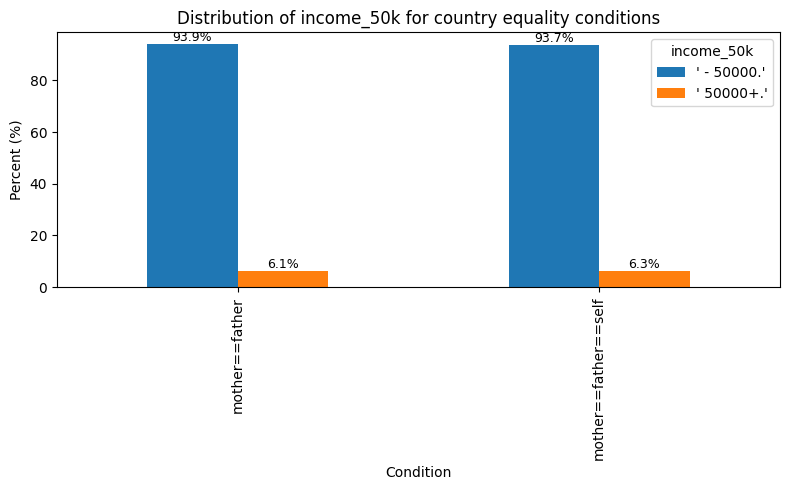

In [26]:
df = X_train.copy()
df['income_50k'] = y_train

mask_mf = df['country_mother'] == df['country_father']
mask_mfs = (df['country_mother'] == df['country_father']) & (df['country_mother'] == df['country_self'])

counts_mf = df[mask_mf]['income_50k'].value_counts(normalize=True).sort_index()
counts_mfs = df[mask_mfs]['income_50k'].value_counts(normalize=True).sort_index()

plot_df = pd.DataFrame({
    'mother==father': counts_mf,
    'mother==father==self': counts_mfs
}).fillna(0) * 100

ax = plot_df.T.plot(kind='bar', figsize=(8, 5))
ax.set_ylabel('Percent (%)')
ax.set_xlabel('Condition')
ax.set_title('Distribution of income_50k for country equality conditions')
ax.legend(title='income_50k', loc='best')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

### Observations:
- **Distribution Stability:** The income distribution is nearly identical (~6% >50k) for both 'matching parents' and 'matching family' conditions
- **Dimensionality Solution:** Detailed country data introduces excessive noise; the boolean condition `country_mother == country_father == country_self` captures the core "origin stability" signal
- **Redundancy:** Since adding the individual (`_self`) to the condition does not alter the distribution, the stricter "all-match" feature is a sufficient proxy to replace the three original columns

### 5.5 `vet_question`
The `vet_question` feature pertains to veteran benefits administration but appears to be applicable to only a tiny fraction of the population. We analyze the variance of this feature to determine if it holds enough information to justify its inclusion in the model, or if it acts as a quasi-constant variable.

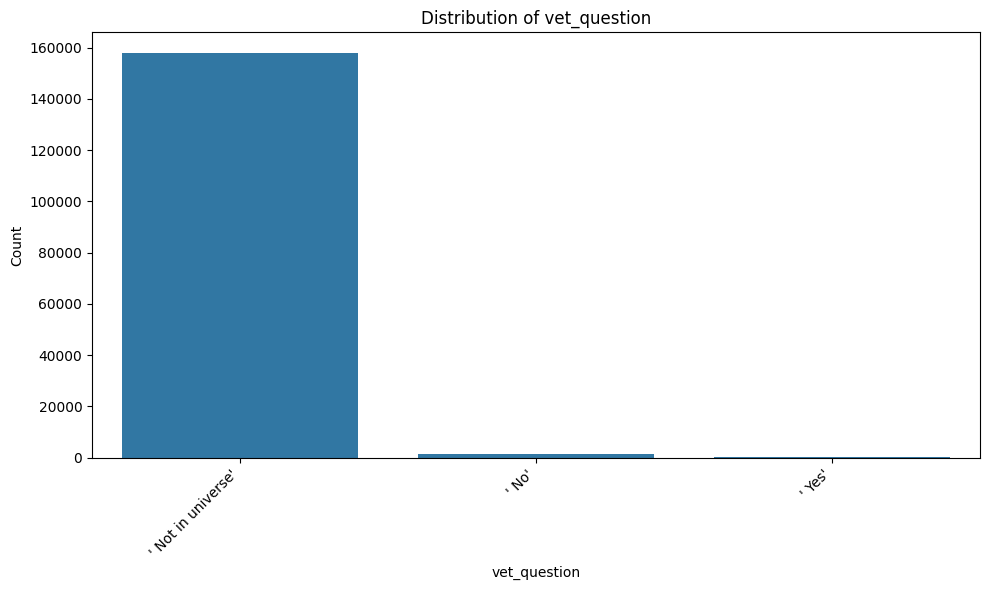

In [27]:
plt.figure(figsize=(10,6))
order = X_train['vet_question'].value_counts().index
sns.countplot(data=X_train, x='vet_question', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('vet_question')
plt.title('Distribution of vet_question')
plt.tight_layout()
plt.show()

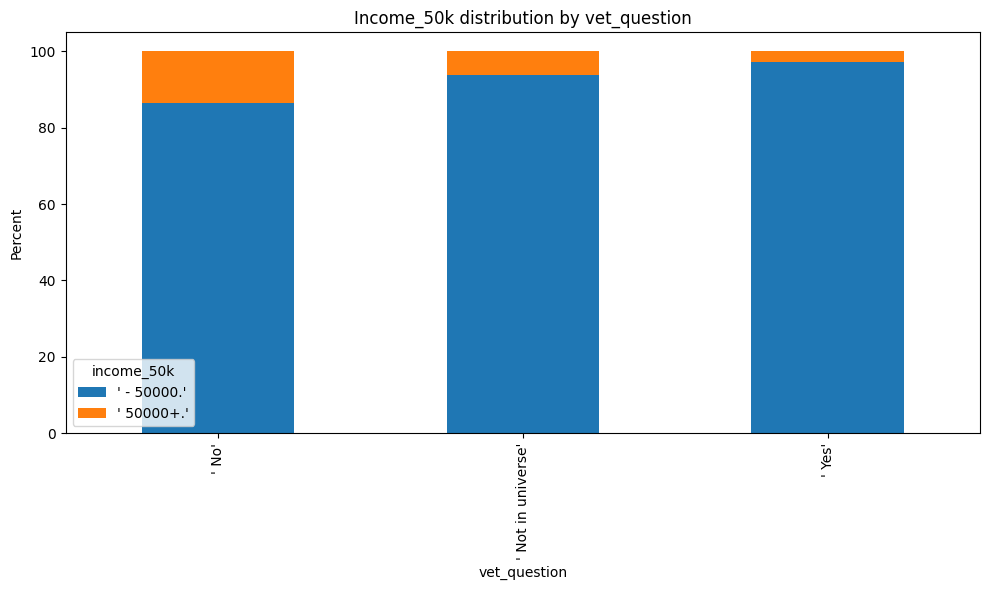

In [28]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['vet_question'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Percent')
ax.set_xlabel('vet_question')
ax.set_title('Income_50k distribution by vet_question')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Quasi-Constant Feature:** The feature is overwhelmingly dominated by the category `' Not in universe'` (>99% of the data)
- **Negligible Information:** The variance is too low to provide any statistical significance

### 5.6 `unemp_reason`
The feature `unemp_reason` attempts to explain the cause of unemployment. We analyze the variance of this feature to determine if it holds enough information to justify its inclusion in the model, or if it acts as a quasi-constant variable.

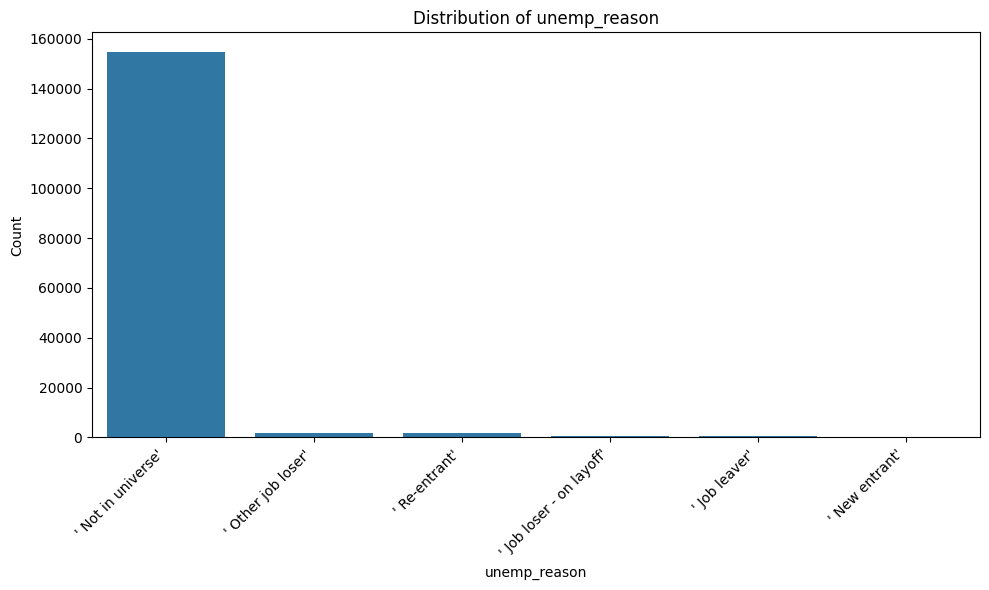

In [29]:
plt.figure(figsize=(10,6))
order = X_train['unemp_reason'].value_counts().index
sns.countplot(data=X_train, x='unemp_reason', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('unemp_reason')
plt.title('Distribution of unemp_reason')
plt.tight_layout()
plt.show()

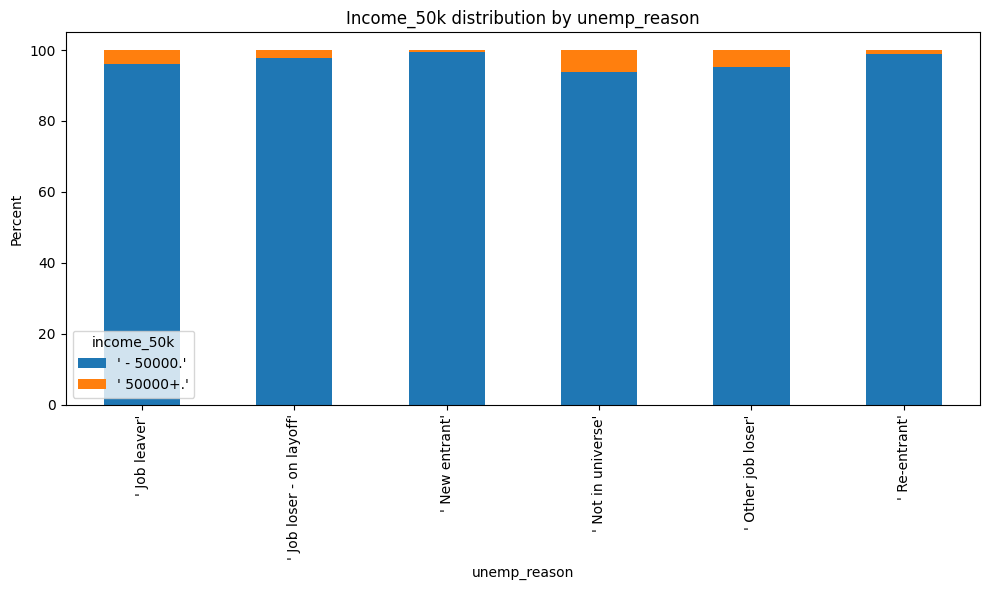

In [30]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['unemp_reason'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Percent')
ax.set_xlabel('unemp_reason')
ax.set_title('Income_50k distribution by unemp_reason')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Quasi-Constant Feature:** The feature is dominated by the `' Not in universe'` category
- **No Discriminative Power:** The target distribution is uniform across all categories; regardless of the unemployment reason, the probability of high income is near zero
- **Redundancy:** The feature adds noise without providing any separation between income classes compared to broader employment features

### 5.7 `full_or_part_emp`

The `full_or_part_emp` feature details employment status but suffers from fragmentation (e.g., multiple variations of part-time work). We test the hypothesis that granular distinctions between different types of part-time or unemployment reasons are less important than the broad labor force status (Full-Time, Part-Time, Inactive, Children).

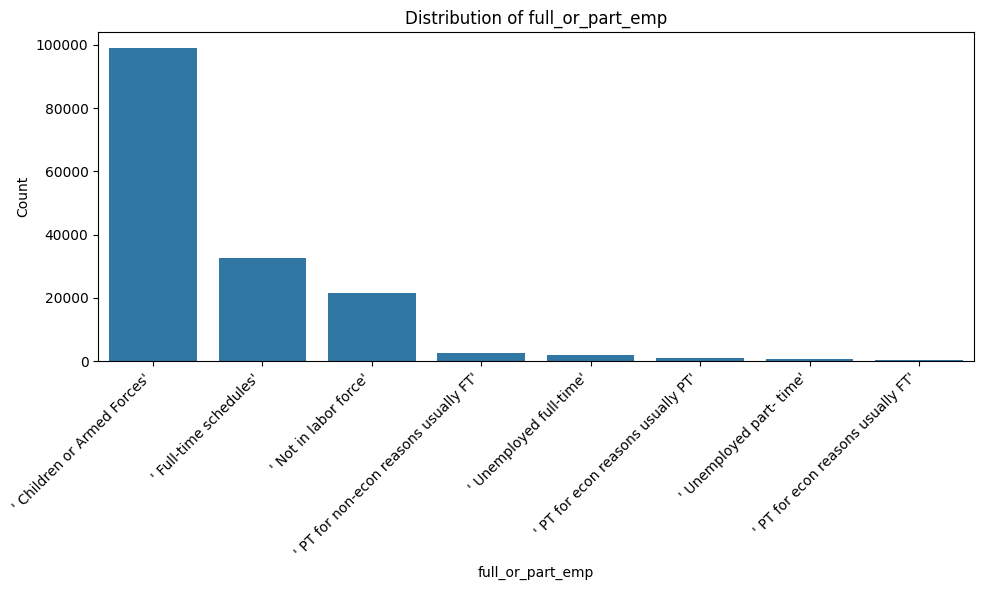

In [31]:
plt.figure(figsize=(10,6))
order = X_train['full_or_part_emp'].value_counts().index
sns.countplot(data=X_train, x='full_or_part_emp', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('full_or_part_emp')
plt.title('Distribution of full_or_part_emp')
plt.tight_layout()
plt.show()

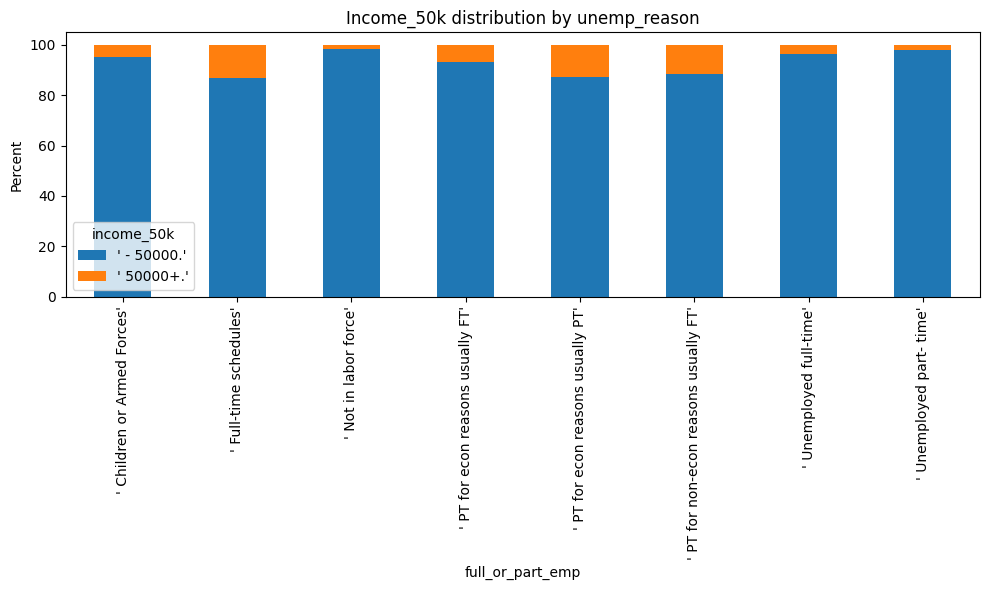

In [32]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['full_or_part_emp'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Percent')
ax.set_xlabel('full_or_part_emp')
ax.set_title('Income_50k distribution by unemp_reason')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Dominant Low-Income Group:** The category `'Children or Armed Forces'` constitutes the majority of the data and is almost exclusively associated with **< 50k income**
- **Strongest Predictor:** `'Full-time schedules'` shows the highest proportion of high earners (> 50k), confirming it as a key predictive signal
- **Fragmentation:** Detailed categories for part-time work (e.g., 'PT for econ reasons') show similar distributions and add unnecessary complexity
- **Proposed Grouping:** we will map the original values into 4 broad categories:
    - **Full-Time:** `'Full-time schedules'`
    - **Part-Time:** `'PT for non-econ reasons usually FT'`, `'PT for econ reasons usually PT'`, `'PT for non-econ reasons usually PT'`, `'PT for econ reasons usually FT'`
    - **Inactive:** `'Not in labor force'`, `'Unemployed full-time'`, `'Unemployed part-time'`
    - **Children/Other:** `'Children or Armed Forces'`

### 5.8 `class_worker`

Some categories appear frequently while others are rare or semantically similar. We test the hypothesis that consolidating these categories into broader groups (e.g., combining State and Local government) can reduce dimensionality while maintaining the distinct income patterns observed in the data.

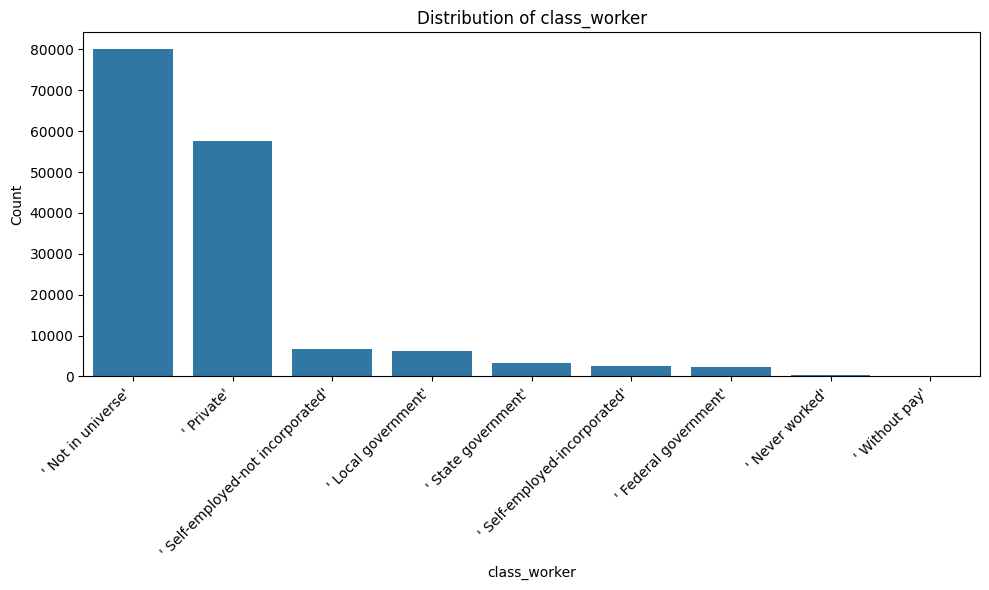

In [33]:
plt.figure(figsize=(10,6))
order = X_train['class_worker'].value_counts().index
sns.countplot(data=X_train, x='class_worker', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('class_worker')
plt.title('Distribution of class_worker')
plt.tight_layout()
plt.show()

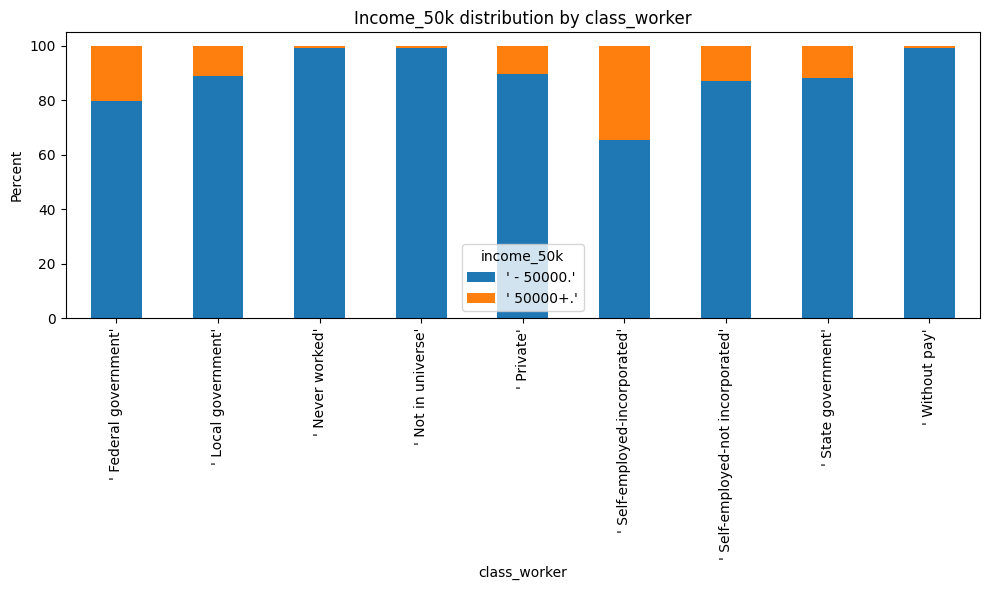

In [34]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['class_worker'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(10,6))
ax.set_ylabel('Percent')
ax.set_xlabel('class_worker')
ax.set_title('Income_50k distribution by class_worker')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Highest Earner Signal:** `'Self-employed-incorporated'` exhibits the highest proportion of >50k earners (~60%), acting as a strong positive predictor.
- **Non-Earner Group:** 'Never worked', 'Without pay', and 'Not in universe' show a near-zero probability of high income.
- **Government Consistency:** 'State government' and 'Local government' show very similar income distributions, justifying their combination.
- **Proposed Grouping:** To reduce dimensionality, we will apply the following mappings:
    - **Non-Active:** Combine `'Never worked'`, `'Without pay'`, and `'Not in universe'`.
    - **State-Local-Gov:** Combine `'Local government'` and `'State government'`.

### 5.9 `major_occ_code`, `major_ind_code`

These features have high cardinality. Treating every category as a distinct feature would create a sparse matrix. We hypothesize that these categories can be clustered into broader groups based on their median income levels, reducing dimensionality while preserving the socio-economic signal.

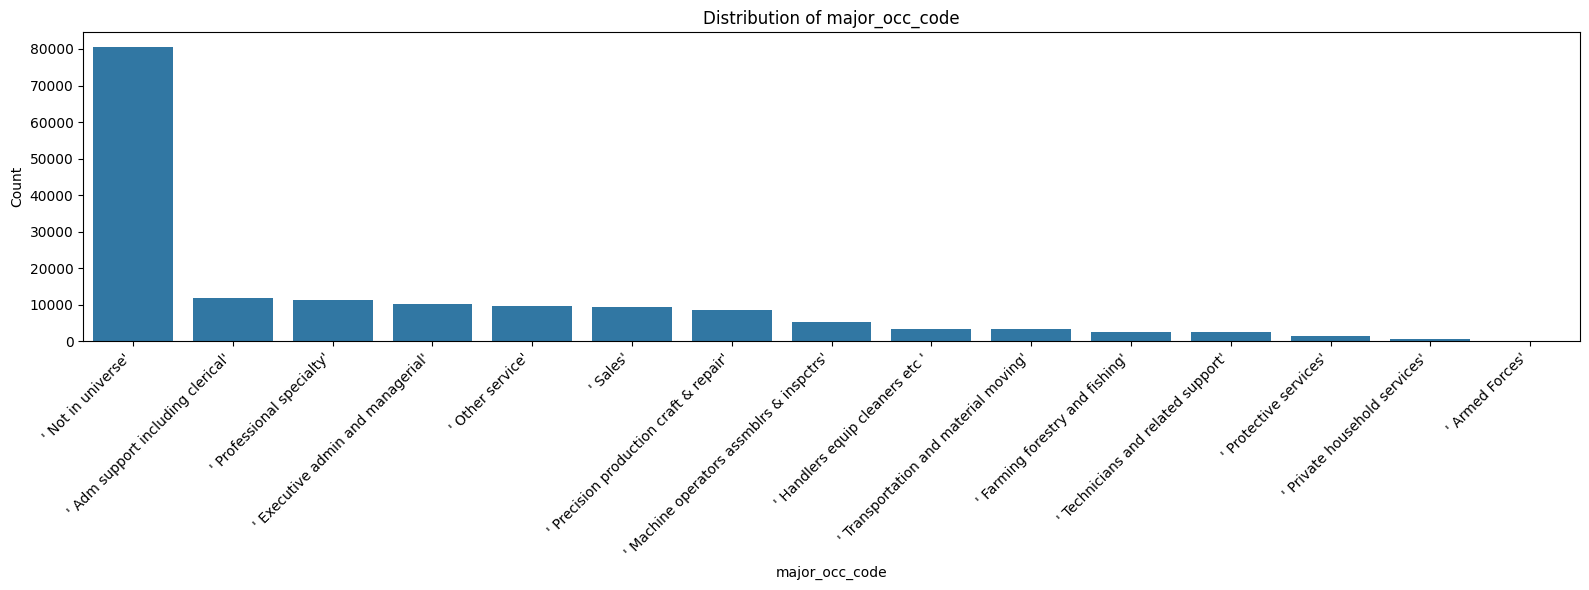

In [35]:
plt.figure(figsize=(16,6))
order = X_train['major_occ_code'].value_counts().index
sns.countplot(data=X_train, x='major_occ_code', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('major_occ_code')
plt.title('Distribution of major_occ_code')
plt.tight_layout()
plt.show()

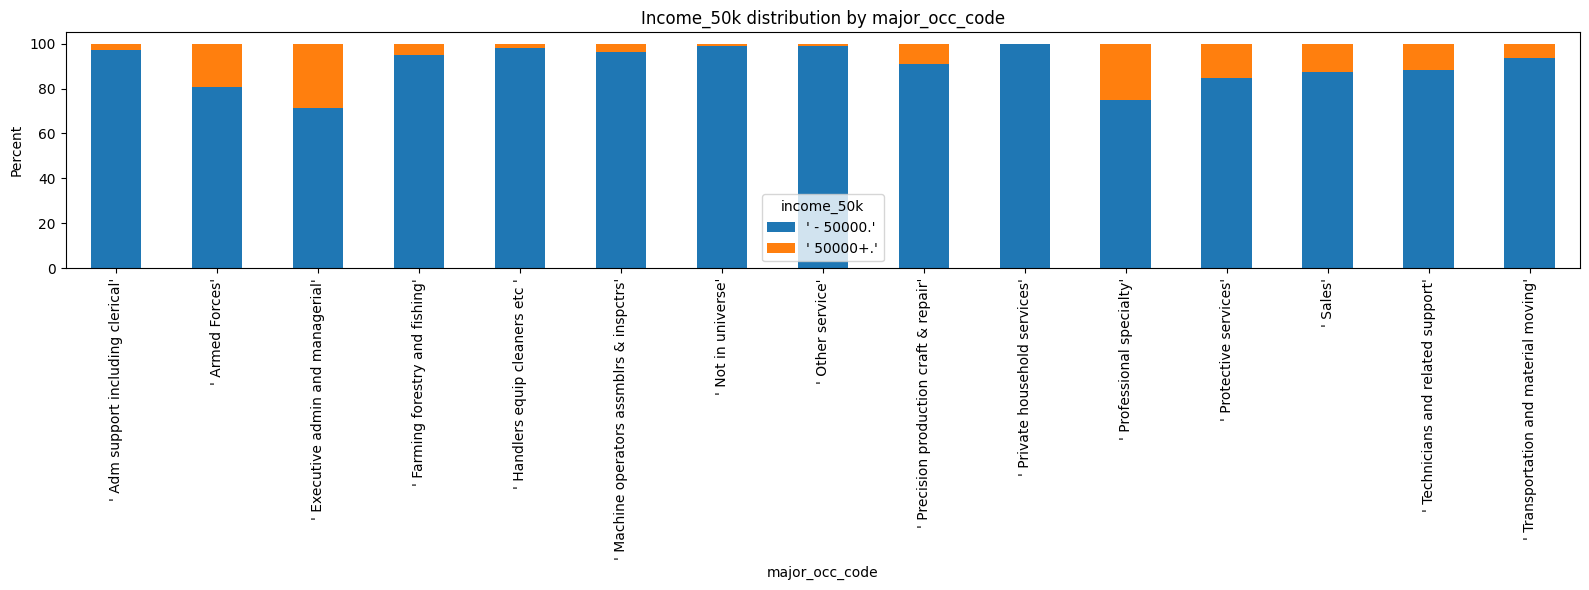

In [36]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['major_occ_code'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('major_occ_code')
ax.set_title('Income_50k distribution by major_occ_code')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

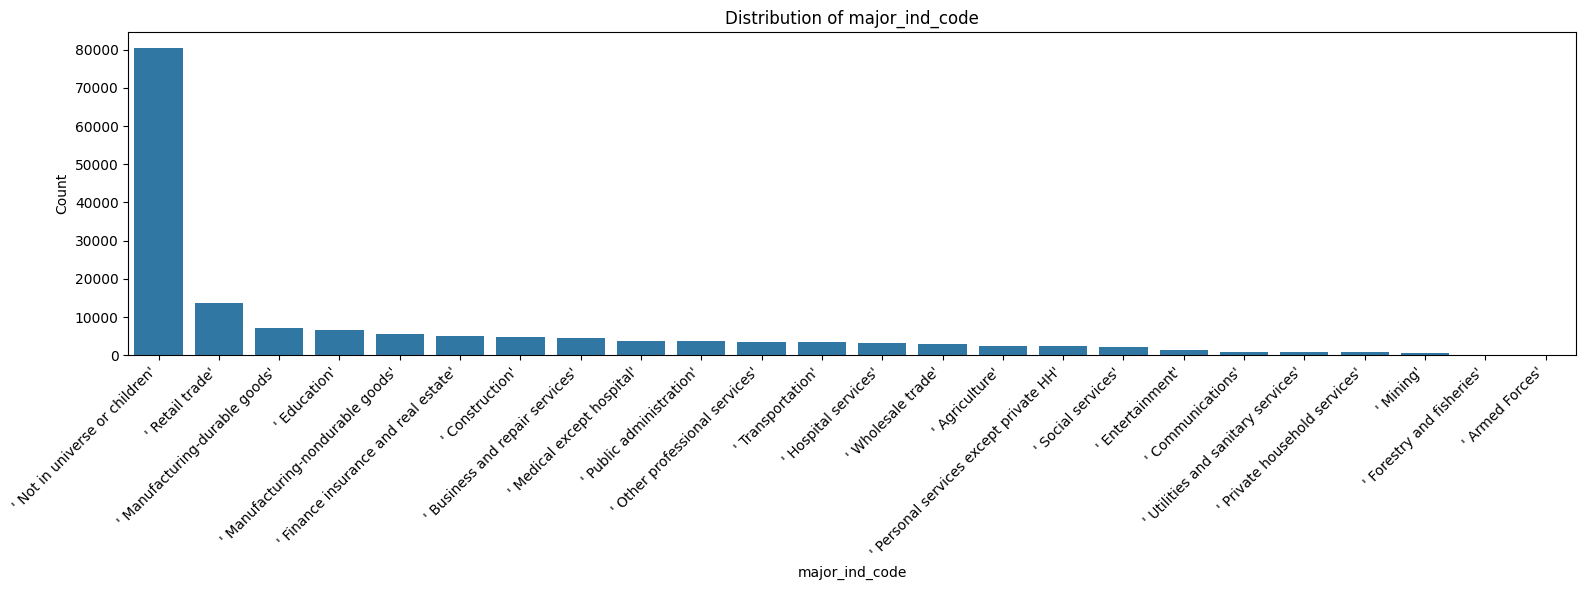

In [37]:
plt.figure(figsize=(16,6))
order = X_train['major_ind_code'].value_counts().index
sns.countplot(data=X_train, x='major_ind_code', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('major_ind_code')
plt.title('Distribution of major_ind_code')
plt.tight_layout()
plt.show()

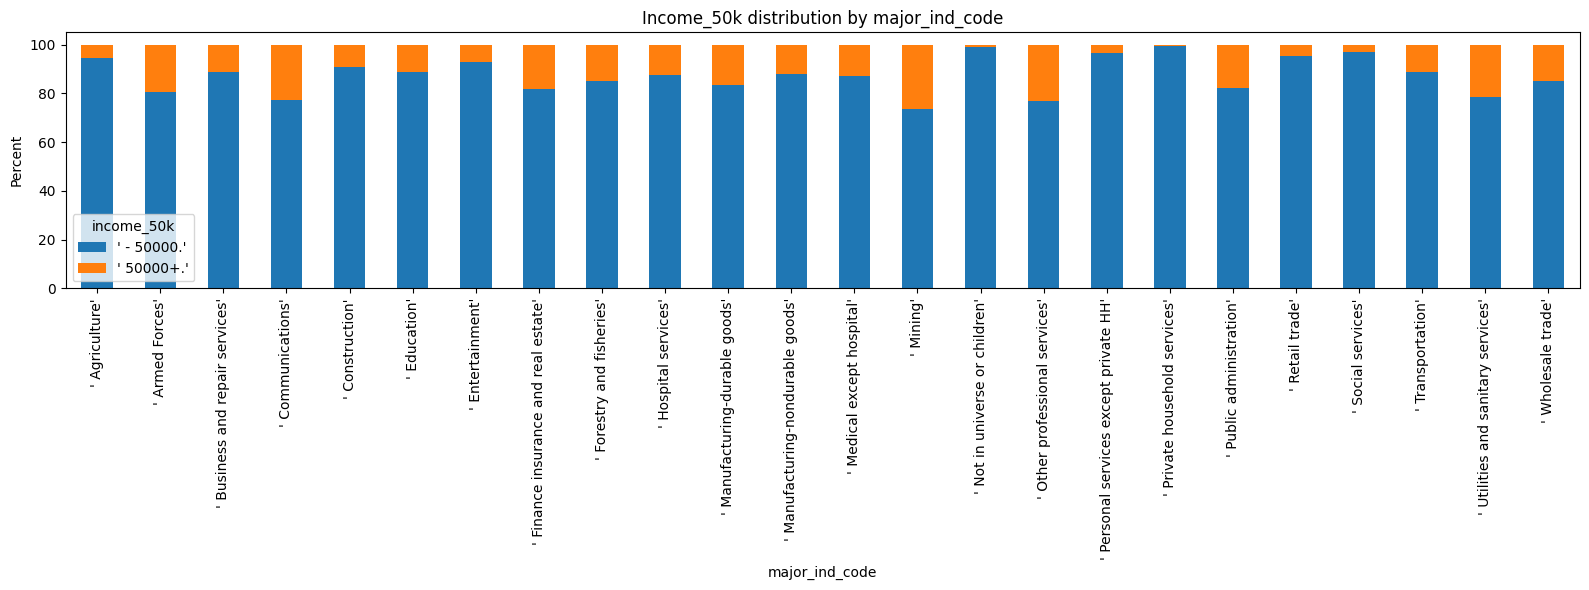

In [38]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['major_ind_code'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('major_ind_code')
ax.set_title('Income_50k distribution by major_ind_code')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **High Cardinality:** Both features contain numerous categories, creating a risk of the "curse of dimensionality."
- **Income Correlation:** Clear clusters of industries and occupations exist where high-income probability is significantly higher (e.g., 'Executive admin') or lower (e.g., 'Private household').
- **Proposed Grouping (`major_ind_code`):**
    - **High_Yield:** `'Mining'`, `'Finance insurance and real estate'`, `'Public administration'`, `'Communications'`, `'Manufacturing-durable goods'`
    - **Low_Yield:** `'Retail trade'`, `'Personal services except private HH'`, `'Agriculture'`, `'Private household services'`, `'Wholesale trade'`, `'Forestry and fisheries'`, `'Entertainment'`
    - **Average_Yield:** `'Construction'`, `'Education'`, `'Business and repair services'`, `'Medical except hospital'`, `'Hospital services'`, `'Transportation'`, `'Utilities and sanitary services'`
- **Proposed Grouping (`major_occ_code`):**
    - **High_Income:** `'Executive admin and managerial'`, `'Professional specialty'`
    - **Mid_Income:** `'Sales'`, `'Protective services'`, `'Technicians and related support'`, `'Precision production craft & repair'`
    - **Low_Income:** `'Machine operators assmblrs & inspctrs'`, `'Transportation and material moving'`, `'Farming forestry and fishing'`, `'Handlers equip cleaners etc'`, `'Adm support including clerical'`
    - **Minimal_Income:** `'Private household services'`, `'Not in universe'`, `'Other service'`, `'Armed Forces'`

### 5.10 `det_hh_summ`, `det_hh_fam_stat`

These features provide granular details on household composition but exhibit high redundancy and cardinality. We aim to simplify these features into a high-level structure.

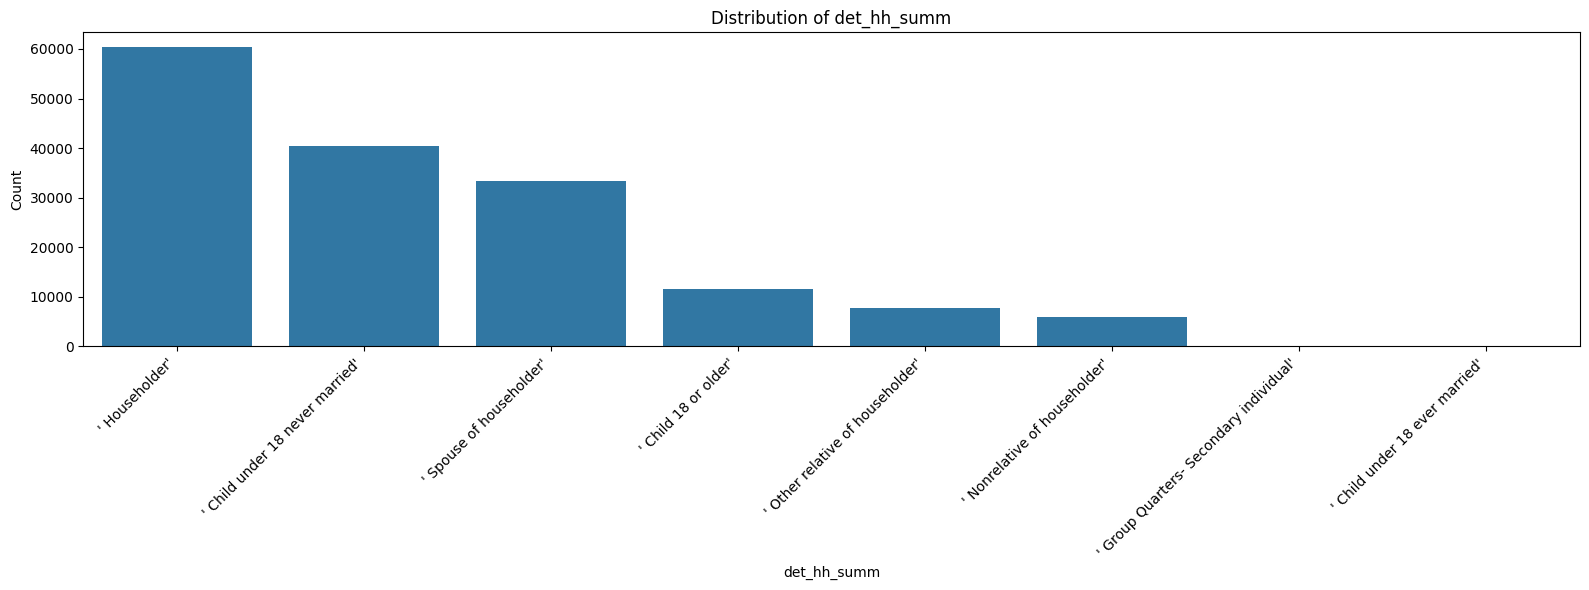

In [39]:
plt.figure(figsize=(16,6))
order = X_train['det_hh_summ'].value_counts().index
sns.countplot(data=X_train, x='det_hh_summ', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('det_hh_summ')
plt.title('Distribution of det_hh_summ')
plt.tight_layout()
plt.show()

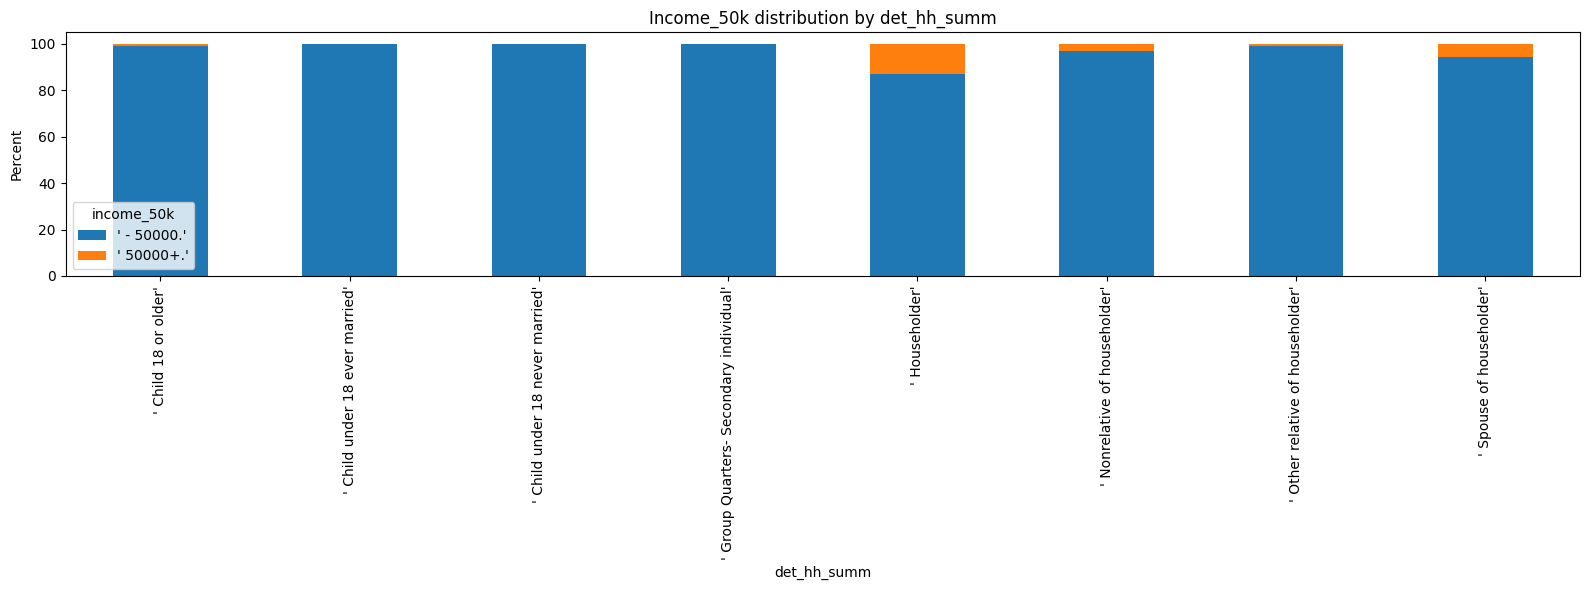

In [40]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['det_hh_summ'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('det_hh_summ')
ax.set_title('Income_50k distribution by det_hh_summ')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

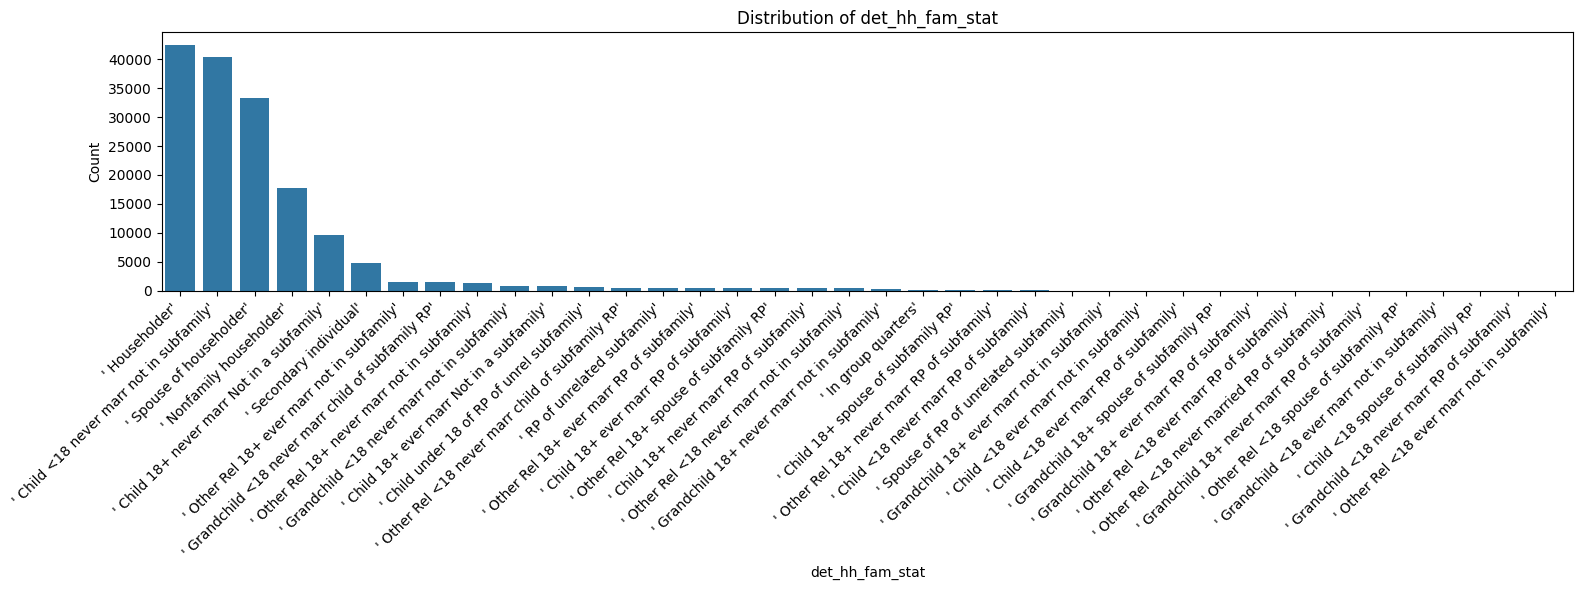

In [41]:
plt.figure(figsize=(16,6))
order = X_train['det_hh_fam_stat'].value_counts().index
sns.countplot(data=X_train, x='det_hh_fam_stat', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('det_hh_fam_stat')
plt.title('Distribution of det_hh_fam_stat')
plt.tight_layout()
plt.show()

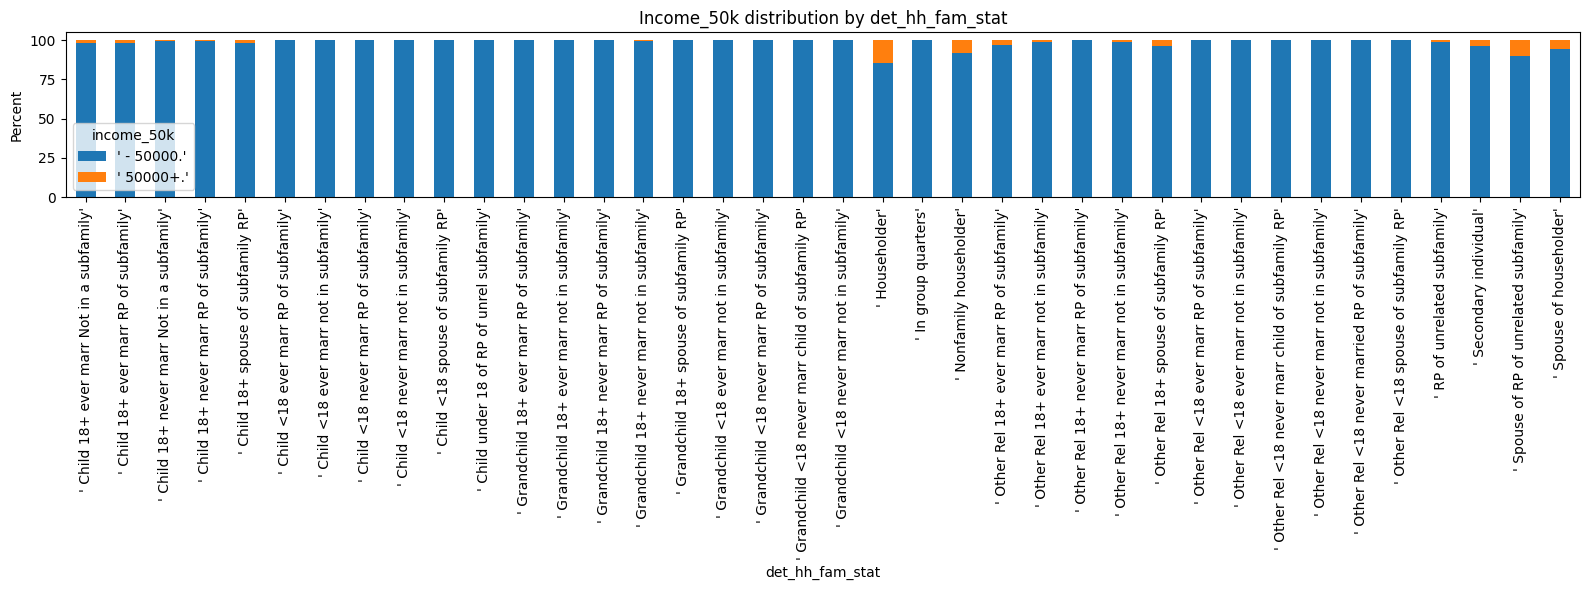

In [42]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['det_hh_fam_stat'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('det_hh_fam_stat')
ax.set_title('Income_50k distribution by det_hh_fam_stat')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **High Redundancy:** `det_hh_fam_stat` contains excessive detail that overlaps with `det_hh_summ`.
- **Economic Drivers:** The categories `'Householder'` and `'Spouse'` are the primary income generators.
- **Dependent Zero-Variance:** All 'Child', 'Relative', and 'Non-relative' categories show negligible probability of high income.
- **Simplification Potential:** The complex hierarchy allows for mapping the values into 3 distinct economic roles:
    - **Householder:** `'Householder'`
    - **Spouse:** `'Spouse of householder'`
    - **Other_Dependent:** All remaining categories (Children, Relatives, Group Quarters, etc.)

### 5.11 `citizenship`

The `citizenship` feature details the legal status of individuals using 5 categories. Some of these (e.g., born in Puerto Rico) are rare. We test the hypothesis that the exact method of obtaining citizenship is less important than the broad legal status (Native vs. Naturalized vs. Non-Citizen) and verify if 'Naturalized' citizens exhibit distinct income patterns justifying a separate category.

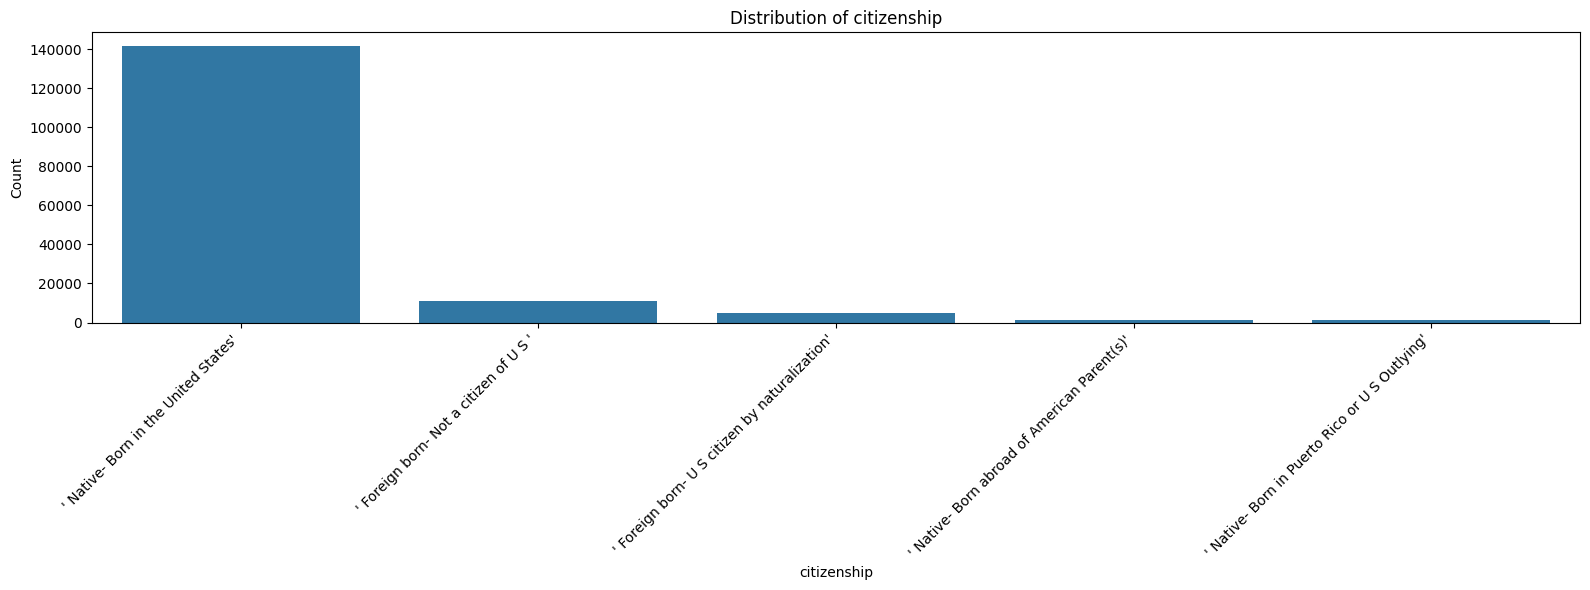

In [43]:
plt.figure(figsize=(16,6))
order = X_train['citizenship'].value_counts().index
sns.countplot(data=X_train, x='citizenship', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('citizenship')
plt.title('Distribution of citizenship')
plt.tight_layout()
plt.show()

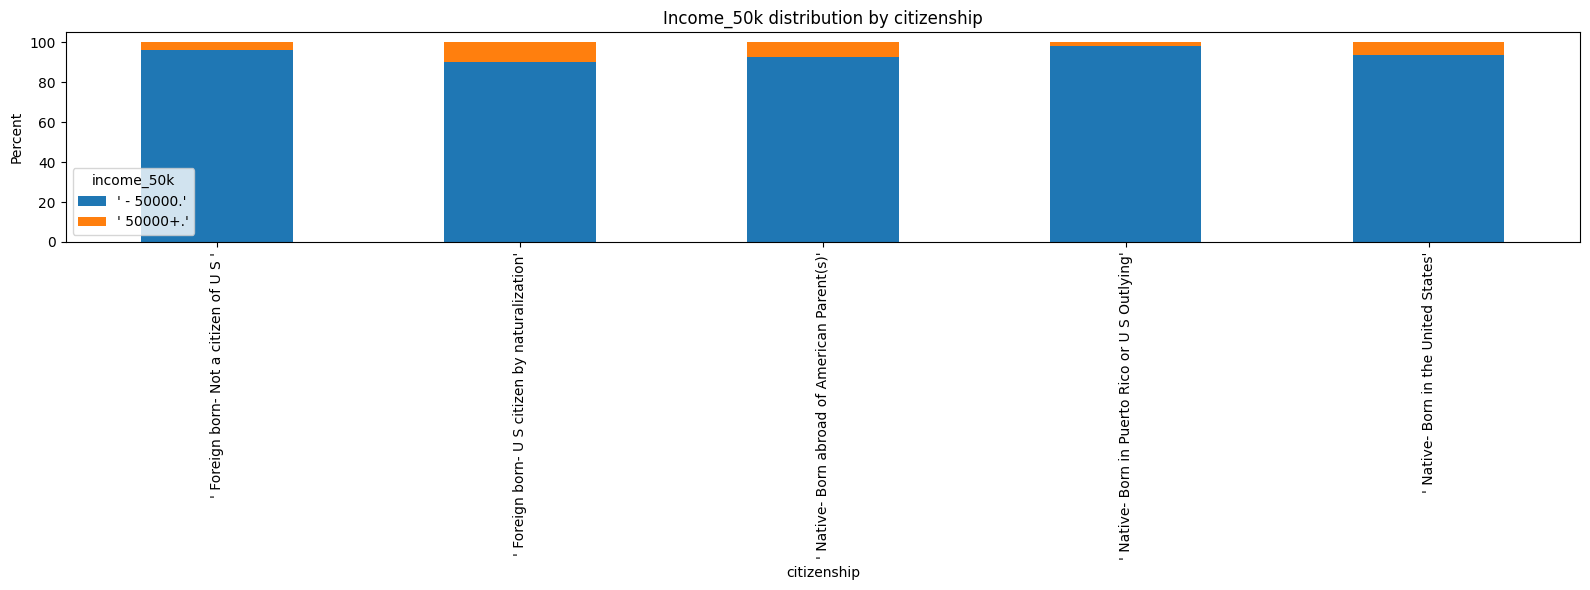

In [44]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['citizenship'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('citizenship')
ax.set_title('Income_50k distribution by citizenship')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Naturalization Premium:** `'Foreign born- U S citizen by naturalization'` exhibits a slightly higher proportion of high earners (>50k) than native-born citizens, justifying keeping this category distinct.
- **Non-Citizen Gap:** `'Foreign born- Not a citizen of U S'` shows a visibly lower probability of high income.
- **Rare Categories:** Categories like `'Native- Born in Puerto Rico...'` or `'Born abroad...'` are rare and behave similarly to the main native group.
- **Proposed Grouping:** We will reduce the feature to 3 meaningful legal status groups:
    - **US Native:** Combine `'Native- Born in the United States'`, `'Native- Born abroad of American Parent(s)'`, and `'Native- Born in Puerto Rico or U S Outlying'`
    - **Naturalized:** `'Foreign born- U S citizen by naturalization'`
    - **Non-Citizen:** `'Foreign born- Not a citizen of U S'`

### 5.12 `fam_under_18`

The `fam_under_18` feature tracks the family structure for individuals under 18. We analyze whether the specific household arrangement (e.g., living with both parents vs. one) affects income prediction.

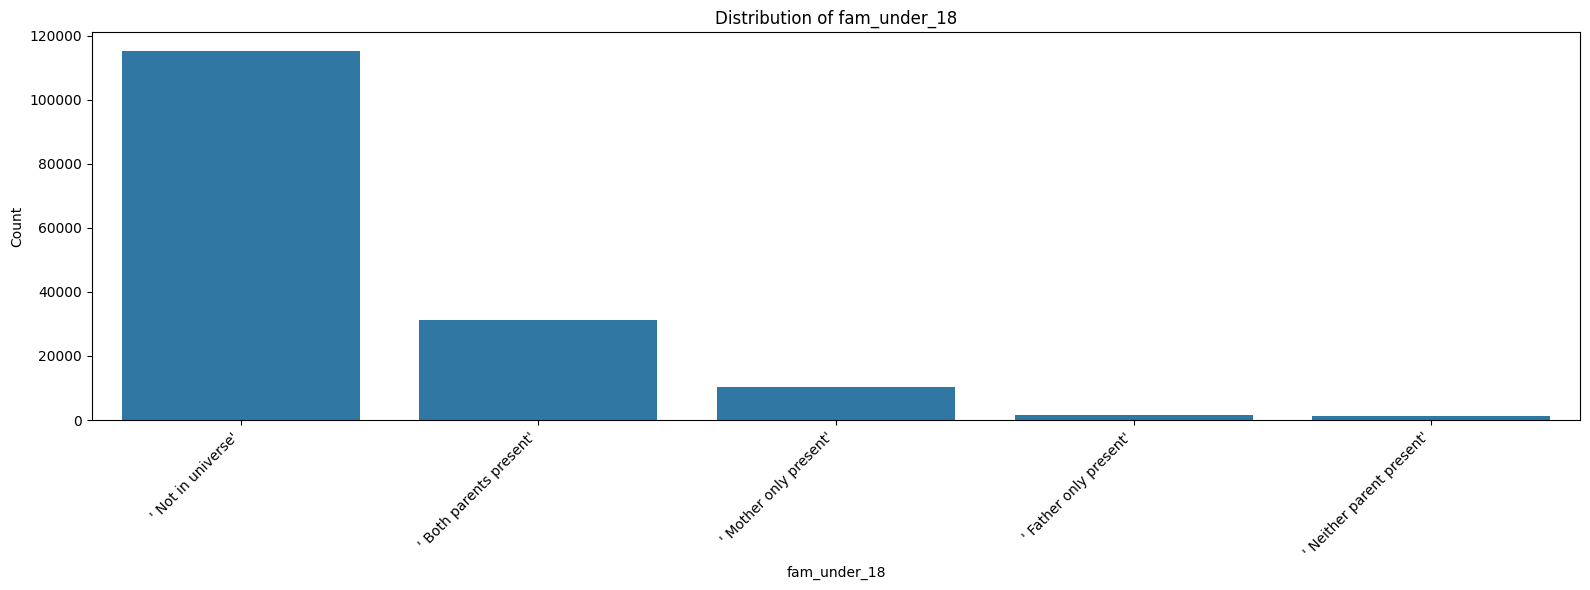

In [45]:
plt.figure(figsize=(16,6))
order = X_train['fam_under_18'].value_counts().index
sns.countplot(data=X_train, x='fam_under_18', order=order, color='#1E7BB6')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.xlabel('fam_under_18')
plt.title('Distribution of fam_under_18')
plt.tight_layout()
plt.show()

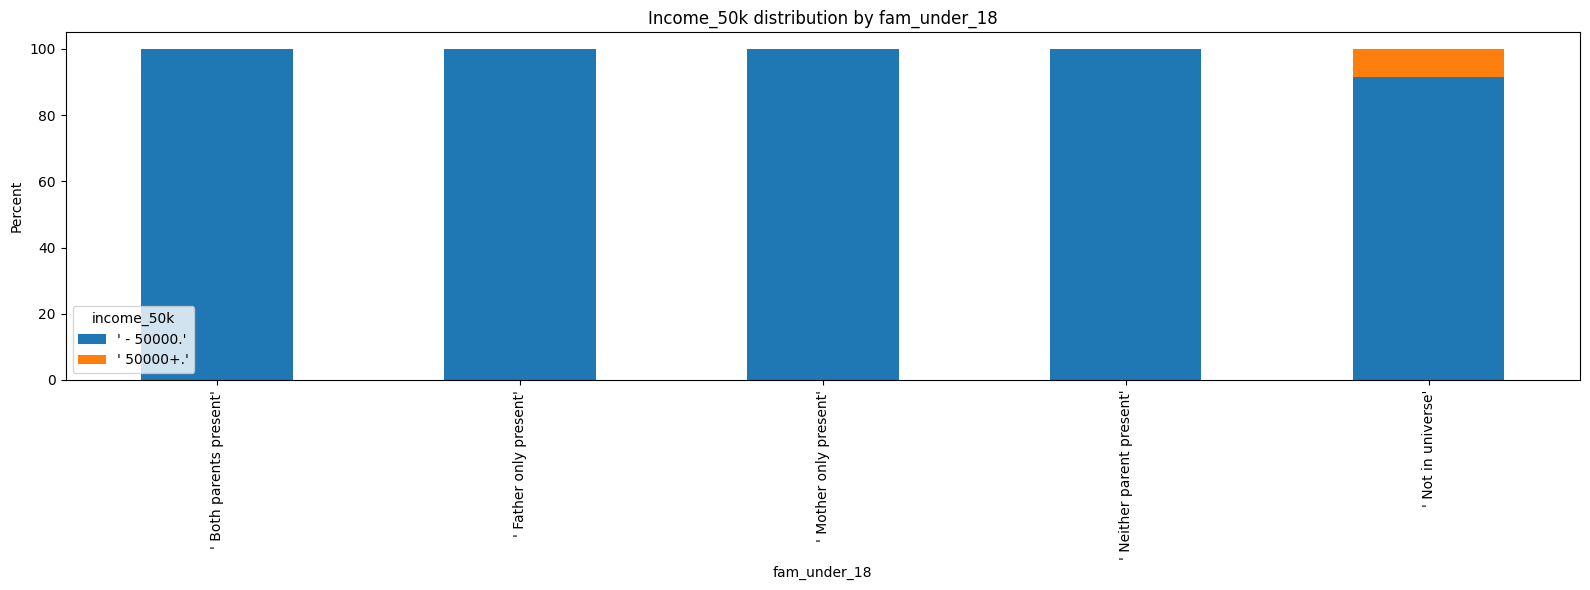

In [46]:
df = X_train.copy()
df['income_50k'] = y_train
ct = pd.crosstab(df['fam_under_18'], df['income_50k'])
props = ct.div(ct.sum(axis=1), axis=0) * 100
ax = props.plot(kind='bar', stacked=True, figsize=(16,6))
ax.set_ylabel('Percent')
ax.set_xlabel('fam_under_18')
ax.set_title('Income_50k distribution by fam_under_18')
plt.legend(title='income_50k', loc='best')
plt.tight_layout()
plt.show()

### Observations:
- **Zero-Income Segment:** All specific categories (e.g., `'Both parents present'`, `'Mother only present'`) have a near-zero probability of earning >50k, as they strictly identify children.
- **Signal Concentration:** The `' Not in universe'` category contains practically all high-income earners (adults).
- **Simplification:** Detailed family structure adds no value for income prediction.
- **Proposed Transformation:** Reduce the feature to a single binary flag `is_child` (1 if the value is not `' Not in universe'`, else 0).

### 5.13 `capital_gains`, `capital_losses`

These features capture investment movements and the financial status of individuals. We analyze their relationship to evaluate the feasibility of creating a consolidated `net_capital` feature (`capital_gains` - `capital_losses`) to represent the overall financial trajectory.

Correlation between Gains and Losses:
                capital_gains  capital_losses
capital_gains        1.000000       -0.012764
capital_losses      -0.012764        1.000000


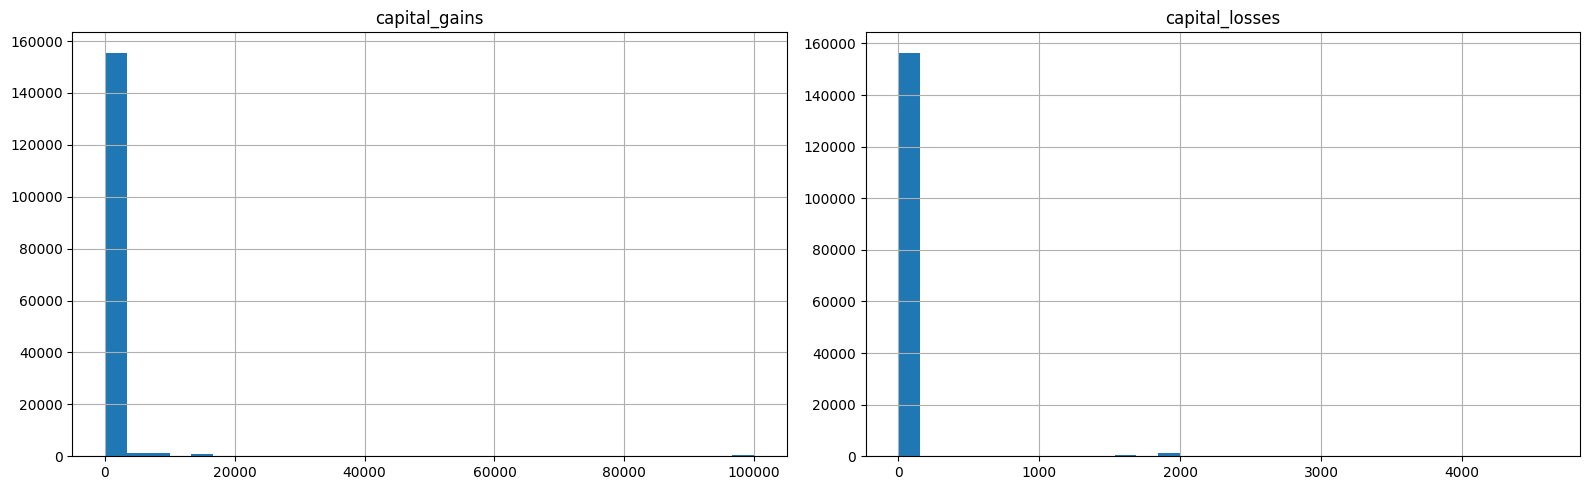

In [47]:
df_cap = X_train[['capital_gains', 'capital_losses']].copy()
df_cap['income_50k'] = y_train

print("Correlation between Gains and Losses:")
print(df_cap[['capital_gains', 'capital_losses']].corr())

df_cap[['capital_gains', 'capital_losses']].hist(bins=30, figsize=(16, 5))
plt.tight_layout() 
plt.show()

### Observations:
* **Orthogonality:** The correlation between `capital_gains` and `capital_losses` is approximately **0**. This confirms that gains and losses are independent events that rarely occur simultaneously for the same individual.
* **Consolidation Strategy:** Since the features do not overlap, creating a **`net_capital`** feature (`capital_gains` - `capital_losses`) is a strong approach to capture the full spectrum of financial movement in a single variable.
* **Signal Extraction:** To maximize information density, we propose adding a binary **`is_investor`** flag to capture the behavioral aspect of having assets. Consequently, the original raw features can be **removed** in favor of these engineered features to reduce dimensionality.

### 5.14 `wage_per_hour`

The wage_per_hour variable contains a significant number of zero values. The objective of this step is to determine if these zeros represent missing data (nulls) or valid information resulting from the respondents' employment status.

In [17]:
zero_wage_df = X_train[X_train['wage_per_hour'] == 0]

print(f"Total rows with wage_per_hour == 0: {len(zero_wage_df)}")

not_working = zero_wage_df[zero_wage_df['weeks_worked'] == 0]
working = zero_wage_df[zero_wage_df['weeks_worked'] > 0]

print(f"Individuals who did not work (weeks_worked == 0): {len(not_working)}")
print(f"Individuals who worked (weeks_worked > 0): {len(working)}")

print("\nClass worker distribution for employed individuals with 0 wage:")
print(working['education'].value_counts())

Total rows with wage_per_hour == 0: 150547
Individuals who did not work (weeks_worked == 0): 76531
Individuals who worked (weeks_worked > 0): 74016

Class worker distribution for employed individuals with 0 wage:
education
' High school graduate'                      23383
' Some college but no degree'                15064
' Bachelors degree(BA AB BS)'                12398
' Masters degree(MA MS MEng MEd MSW MBA)'     4299
' Associates degree-occup /vocational'        3105
' 11th grade'                                 2728
' Associates degree-academic program'         2590
' 10th grade'                                 2474
' 7th and 8th grade'                          1703
' 9th grade'                                  1659
' Prof school degree (MD DDS DVM LLB JD)'     1226
' 5th or 6th grade'                           1002
' Doctorate degree(PhD EdD)'                   855
' 12th grade no diploma'                       848
' 1st 2nd 3rd or 4th grade'                    489
' Less than 

### Observations:
- **Analysis of Zero Wage Entries:** The analysis suggests that values of 0 in wage_per_hour for individuals who have worked (weeks_worked > 0) are likely not missing data, but rather represent non-hourly employees.

## 6. Class Balance

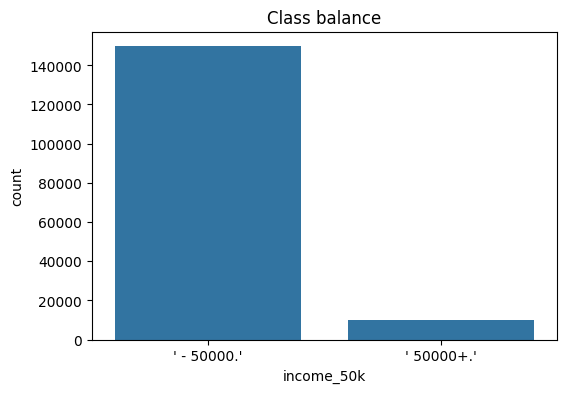

In [48]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Class balance')
plt.show()

### Observation:
- **Severe Imbalance**

## 7. Key Conclusions & Strategy

### 7.1 Dataset Profile
- **Volume:** Large dataset (~160k rows, 40+ columns)
- **Class Imbalance:** Severe imbalance detected (~94% `<50k` vs. ~6% `>50k`)
- **Demographics:** A significant portion of the dataset represents children/non-workers
- **Data Format:** Categorical Feautures are formatted as `' ...'`

### 7.2 Candidates for Exclusion
- **Ethical Exclusions:** `race`, `sex`, `hisp_origin`
- **Low Variance / Quasi-Constant:** `vet_question`, `unemp_reason`, `year`, `unknown`
- **High Missingness / Noise:** `mig_prev_sunbelt`
- **Redundant / Ambiguous:** `det_ind_code`, `det_occ_code` (replaced by `major_` codes), `own_or_self`, `vet_benefits` (lack of data dictionary), `state_prev_res`, `region_prev_res` (replaced by `mig_same`)
- **Multicollinearity:**
    - `num_emp` vs. `weeks_worked` (~0.75)
    - `vet_benefits` vs. `age` (~0.68)

### 7.3 Feature Engineering Plan

* **Consolidation (Binary Flags):**
    * `is_mig_universe`: Consolidates `mig_chg_reg`, `mig_move_reg`, `mig_chg_msa` (1 if all are 'Not in universe')
    * `is_child`: Derived from `fam_under_18`
    * `is_family_match`: Consolidates `country_mother/father/self` (1 if all origins match)
    * `net_capital` and `is_investor`: Derived from `capital_gains` and `capital_losses`

* **Categorical Grouping (Target Encoding approach):**
    * **Economy:** Group `major_ind_code` and `major_occ_code` into High/Mid/Low yield clusters
    * **Employment:** Simplify `class_worker` and `full_or_part_emp` into broader categories (e.g., Active vs. Inactive)
    * **Household:** Simplify `det_hh_fam_stat` and `det_hh_summ` into basic roles (Householder, Spouse, Dependent)
    * **Citizenship:** Group into US Native, Naturalized, Non-Citizen

* **Transformations:**
    * **Target Variable:** Map the outcome labels to binary format
    * **Education:** Apply Ordinal Encoding (preserving hierarchy)
    * **Financials:** Apply **careful standardization** to `wage_per_hour`, `capital_gains`, `capital_losses`, `stock_dividends` to handle extreme outliers and capped values

### 7.4 Modeling Implications
- **Critical Constraint:** The severe class imbalance (94% vs 6%) acts as a major bottleneck and **must be urgently addressed** during the training phase to prevent the model from ignoring the minority class.